In [1]:
#importing labraries
import pandas as pd              # import pandas for analyzing, cleaning, exploring, and manipulating data
import numpy as np               # import numpy for working with mathematices part/numerical data
import matplotlib.pyplot as plt  # import matplotlib for visualize data and ploting statistical graph
import seaborn as sns # import seaborn for visualize data and ploting statistical graph
import operator

# Bussiness Case :-

Based on Comfirmed cases,Death cases,Recover cases of per days we have to predict/Forecast how much cases will come in future days and create a predictive model.

# Attribute information

In [2]:
#for comfirmed cases
#data is in csv file so we have to call pd.read_csv from pandas
Comfirmed_cases = pd.read_csv("time_series_covid19_confirmed_global.csv")# loading a dataset
Comfirmed_cases.head()# showing first 5 row of the data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [3]:
#for death cases
#data is in csv file so we have to call pd.read_csv from pandas
Death_cases = pd.read_csv("time_series_covid19_deaths_global.csv")# loading a dataset
Death_cases.head()# showing first 5 row of the data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [4]:
#for recover cases
#data is in csv file so we have to call pd.read_csv from pandas
Recover_cases = pd.read_csv("time_series_covid19_recovered_global.csv")# loading a dataset
Recover_cases.head()# showing first 5 row of the data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [5]:
pd.set_option('display.max_columns',None)# for showing all columns
pd.reset_option('display.max_rows',None)# for showing all columns

In [6]:
Comfirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9

In [7]:
Recover_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.033900,1.659600,0,0

In [8]:
Death_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128,134,138,144,148,150,154,157,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,61

# Basic Checks

In [9]:
Comfirmed_cases.info()# getting infomation of each and every columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [10]:
Comfirmed_cases.describe()# getting statistical information of each and every columns

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.00000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.

In [11]:
Comfirmed_cases.describe(include="O")# getting information of each and every columns of categorical columns

,Province/State,Country/Region
count,81,266
unique,81,188
top,Australian Capital Territory,China
freq,1,33


In [12]:
Recover_cases.info()# getting infomation of each and every columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 490.3+ KB


In [13]:
Recover_cases.describe()# getting statistical information of each and every columns

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.00000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000

In [14]:
Recover_cases.describe(include="O")# getting information of each and every columns of categorical columns

,Province/State,Country/Region
count,67,253
unique,67,188
top,Australian Capital Territory,China
freq,1,33


In [15]:
Death_cases.info()# getting infomation of each and every columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [16]:
Death_cases.describe()# getting statistical information of each and every columns

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.00000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.00000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.0

In [17]:
Death_cases.describe(include="O")# getting information of each and every columns of categorical columns

,Province/State,Country/Region
count,81,266
unique,81,188
top,Australian Capital Territory,China
freq,1,33


#### INSIGHTS

*   In comfirmed cases we can see 188 Country and 81 state.
*   In Death cases we can see 188 Country and 66 state.
*   In Recover cases we can see 188 Country and 67 state.
*   Australian Capital Territory in state and China in Country are common they came more times.

# Data Preprocessing

In [18]:
Comfirmed_cases.isnull().sum()# checking any columns having null value/missing value or not

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [19]:
Recover_cases.isnull().sum()# checking any columns having null value/missing value or not

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [20]:
Death_cases.isnull().sum()# checking any columns having null value/missing value or not

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [21]:
# extracting only dates columns using iloc
Comfirmed = Comfirmed_cases.iloc[:,4:]
Comfirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,

In [22]:
# extracting only dates columns using iloc
Death = Death_cases.iloc[:,4:]
Death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128,134,138,144,148,150,154,157,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,

In [23]:
# extracting only dates columns using iloc
Recover = Recover_cases.iloc[:,4:]
Recover

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,2

In [24]:
# here i'm creating variable and put all dates columns with their value using keys function
date = Comfirmed.keys()
date

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)

In [25]:
world_case = []      # creating list for appending all world casess
Death_case = []      # creating list for appending all death cases
Recover_case = []    # creating list for appending all recover cases
Comfirmed_case = []  # creating list for appending all comfirmed cases
India_case = []      # creating list for appending all cases of India
India_recoverd = []  # creating list for appending all recoverd case of India
India_death = []     # creating list for appending all death case of India

In [26]:
# here i'm going to use loop for getting cases of per day and Total case
for i in date:
    Total_comfirmed = Comfirmed[i].sum()   # getting total comfirmed case of world
    Total_death = Death[i].sum()           # getting total death case of world
    Total_recover = Recover[i].sum()       # getting total recover case of world
    world_case.append(Total_comfirmed)     # appending covid cases of per day of world
    Death_case.append(Total_death)         # appending covid case of per day of death
    Recover_case.append(Total_recover)     # appending covid case of per day of recover
    India_case.append(Comfirmed_cases[Comfirmed_cases["Country/Region"]=="India"][i].sum()) # appending covid case of per day of India
    India_recoverd.append(Recover_cases[Recover_cases["Country/Region"]=="India"][i].sum()) # appending covid recover case of per of India
    India_death.append(Death_cases[Death_cases["Country/Region"]=="India"][i].sum())     # appending covid death case of per of India

In [27]:
Total_comfirmed # total case of world

31245797

In [28]:
Total_death  # total case of death

963693

In [29]:
Total_recover # total case of recover

21394593

In [30]:
print(world_case)   # per day comfirmed case of world 

[555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9926, 12038, 16787, 19887, 23898, 27643, 30802, 34395, 37129, 40159, 42768, 44810, 45228, 60381, 66908, 69050, 71234, 73269, 75151, 75651, 76211, 76840, 78601, 78981, 79545, 80398, 81375, 82735, 84120, 86013, 88395, 90372, 92957, 95272, 98028, 102018, 106036, 109993, 113946, 118967, 126675, 132450, 146783, 157801, 169032, 183677, 199391, 218683, 245633, 275963, 307709, 341784, 384630, 425787, 476680, 539069, 603910, 671653, 731267, 795997, 872495, 948663, 1030010, 1113203, 1193711, 1265377, 1338067, 1415186, 1498895, 1585483, 1672988, 1749872, 1846819, 1916464, 1986284, 2067245, 2163941, 2251672, 2325485, 2406054, 2479522, 2554727, 2631781, 2720583, 2807495, 2892296, 2965076, 3034072, 3109425, 3186589, 3270117, 3357276, 3438689, 3516333, 3592506, 3672660, 3762727, 3851894, 3943470, 4029169, 4105292, 4181640, 4265367, 4350206, 4447281, 4543711, 4639021, 4717335, 4805823, 4902461, 5005574, 5111869, 5218664, 5323977, 5419242, 5506311, 55

In [31]:
print(Death_case) # per day death case of  world

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2008, 2123, 2248, 2252, 2459, 2470, 2630, 2710, 2771, 2814, 2873, 2942, 2996, 3085, 3160, 3255, 3348, 3460, 3559, 3803, 3987, 4267, 4611, 4917, 5414, 5834, 6475, 7153, 7964, 8867, 9981, 11460, 13180, 14854, 16797, 19079, 21877, 24893, 28388, 32102, 35572, 39620, 44365, 49863, 56101, 62205, 68351, 73540, 79481, 87712, 94464, 102237, 109629, 115854, 121671, 127587, 134567, 142918, 150221, 158588, 164601, 169862, 175726, 182917, 189644, 196485, 203142, 208774, 212708, 217382, 223929, 230657, 236559, 241722, 247205, 250694, 254808, 260714, 267277, 272579, 278054, 282287, 285874, 289354, 294889, 299981, 305171, 310304, 314424, 317712, 321412, 326158, 330926, 335657, 340851, 344742, 347870, 349062, 353180, 358326, 362944, 367536, 371610, 374478, 377554, 382296, 387745, 392879, 397453, 401265, 404006, 407707, 412562, 417623, 422322, 426545, 430722, 434129, 

In [32]:
print(Recover_case)  # per day recover case of world

[28, 30, 36, 39, 52, 61, 107, 126, 143, 222, 284, 472, 623, 852, 1124, 1487, 2011, 2616, 3244, 3946, 4683, 5150, 6295, 8058, 9395, 10865, 12583, 14352, 16121, 18177, 18890, 22886, 23394, 25227, 27905, 30384, 33277, 36711, 39782, 42716, 45602, 48228, 51170, 53796, 55865, 58359, 60694, 62493, 64404, 67002, 68324, 70251, 72622, 76032, 78086, 80838, 83321, 84958, 87403, 91670, 97885, 98351, 107992, 113775, 122145, 130921, 139424, 148891, 164337, 177825, 192918, 209967, 225415, 245832, 259672, 276252, 299643, 328359, 353707, 375509, 401766, 421180, 448347, 473436, 510106, 540926, 567049, 590968, 622623, 644613, 679456, 709881, 738661, 788712, 816491, 845096, 872865, 906136, 948318, 1013284, 1051537, 1092416, 1124732, 1158819, 1195359, 1241365, 1280833, 1317383, 1370933, 1404527, 1451521, 1488542, 1544398, 1584114, 1632122, 1688714, 1729621, 1782542, 1834647, 1893575, 1944840, 2053491, 2108462, 2163902, 2227625, 2282839, 2346232, 2413089, 2490435, 2560888, 2637208, 2692105, 2796228, 2875332,

In [33]:
print(India_case)  # per day comfirmed case of India

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 499, 536, 657, 727, 887, 987, 1024, 1251, 1397, 1998, 2543, 2567, 3082, 3588, 4778, 5311, 5916, 6725, 7598, 8446, 9205, 10453, 11487, 12322, 13430, 14352, 15722, 17615, 18539, 20080, 21370, 23077, 24530, 26283, 27890, 29451, 31324, 33062, 34863, 37257, 39699, 42505, 46437, 49400, 52987, 56351, 59695, 62808, 67161, 70768, 74292, 78055, 81997, 85784, 90648, 95698, 100328, 106475, 112028, 118226, 124794, 131423, 138536, 144950, 150793, 158086, 165386, 173491, 181827, 190609, 198370, 207191, 216824, 226713, 236184, 246622, 257486, 265928, 276146, 286605, 297535, 308993, 320922, 332424, 343091, 354065, 366946, 380532, 395048, 410451, 425282, 440215, 456183, 473105, 490401, 508953, 528859, 548318, 566840, 585481, 604641, 625544, 648315, 673165, 697413, 719664, 742417, 767296, 793802,

In [34]:
print(India_recoverd)  # per day recoverd case of India

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 13, 13, 14, 14, 15, 20, 23, 27, 27, 40, 43, 45, 73, 84, 95, 102, 123, 148, 191, 192, 229, 229, 375, 421, 506, 620, 774, 969, 1080, 1181, 1359, 1432, 1768, 2041, 2463, 2854, 3273, 3975, 4370, 5012, 5498, 5939, 6523, 7137, 7747, 8437, 9068, 10007, 10819, 11775, 12847, 14142, 15331, 16776, 17887, 19301, 20969, 22549, 24420, 26400, 27969, 30258, 34224, 36795, 39233, 42309, 45422, 48553, 51824, 54385, 57692, 60706, 64277, 67749, 70920, 82627, 86936, 91852, 95754, 100285, 104071, 108450, 113233, 118695, 123848, 129095, 134670, 135206, 147195, 154330, 162379, 169798, 180013, 186935, 194325, 204711, 213831, 227728, 237196, 248190, 258685, 271697, 285637, 295881, 309713, 321723, 334822, 347912, 359860, 379892, 394227, 409083, 424433, 439934, 456831, 476378, 495513, 515386, 534618, 553471, 571460, 592032, 612768, 635757, 653751, 677423, 7

In [35]:
print(India_death)  # per day death case of India

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 4, 7, 10, 10, 12, 20, 20, 24, 27, 32, 35, 58, 72, 72, 86, 99, 136, 150, 178, 226, 246, 288, 331, 358, 393, 405, 448, 486, 521, 559, 592, 645, 681, 721, 780, 825, 881, 939, 1008, 1079, 1154, 1223, 1323, 1391, 1566, 1693, 1785, 1889, 1985, 2101, 2212, 2294, 2415, 2551, 2649, 2753, 2871, 3025, 3156, 3302, 3434, 3584, 3726, 3868, 4024, 4172, 4344, 4534, 4711, 4980, 5185, 5408, 5608, 5829, 6088, 6363, 6649, 6946, 7207, 7473, 7750, 8102, 8498, 8884, 9195, 9520, 9900, 11903, 12237, 12573, 12948, 13254, 13699, 14011, 14476, 14894, 15301, 15685, 16095, 16475, 16893, 17400, 17834, 18213, 18655, 19268, 19693, 20159, 20642, 21129, 21604, 22123, 22673, 23174, 23727, 24309, 24914, 25602, 26273, 26816, 27497, 28082, 28732, 29861, 30601, 31358, 32060, 32771, 33408, 34193, 34955, 35718, 36511, 37364, 38135, 38938, 39795, 40699,

In [36]:
Total_days = 1 # creating variable with value 1
days_date = [] # creating list for appending how much days we have 


# here i'm running a loop for getting all days in accesending order
for i in range (len(date)):  
    Total_days = i*1                # putting sum of all days
    days_date.append(Total_days)    # here i'm appending total days in assesending order

In [37]:
print(days_date) # total days of case

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [38]:
Total_days   # sum of total days of cases

243

In [39]:
comfirmed_case_latest = Comfirmed_cases[date[-1]]
death_case_latest = Death_cases[date[-1]]
recover_case_latest = Recover_cases[date[-1]]

In [40]:
print(comfirmed_case_latest)

0      39074
1      12535
2      50023
3       1681
4       4117
       ...  
261    36151
262       10
263     2028
264    14175
265     7683
Name: 9/21/20, Length: 266, dtype: int64


In [41]:
death_case_latest

0      1444
1       364
2      1679
3        53
4       154
       ... 
261     265
262       1
263     586
264     331
265     225
Name: 9/21/20, Length: 266, dtype: int64

In [42]:
recover_case_latest

0      32576
1       6995
2      35180
3       1199
4       1449
       ...  
248    24428
249        8
250     1235
251    13629
252     5924
Name: 9/21/20, Length: 253, dtype: int64

In [43]:
# here i'm getting all Country which are affected by COVID-19
Unique_Country = list(Comfirmed_cases["Country/Region"].unique())
print(Unique_Country)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

In [44]:
# the next line of code will basically calculate the total number of comfirmed by each country

country_comfirmed_case = []     # here i'm creating list for country with comfirmed case
no_case = []                    # creating empty list for which country has no cases i will append that
for i in Unique_Country:    # running a loop
    cases = comfirmed_case_latest[Comfirmed_cases["Country/Region"]==i].sum() # creating a variables and adding their case with country wise 
    if cases > 0:
        country_comfirmed_case.append(cases)  # where cases are 0 i'm appending in country_comfirmed_case
    else:
            no_case.append(i)   # otherwise append in no_case
            
            


In [45]:
for i in no_case:    # running a loop
    Unique_Country.remove(i)  # which country has no case i'm going to remove that

In [46]:
# here i'm going to extract all country based on country comfirmed case    
Unique_Country = [k for k, v in sorted(zip(Unique_Country,country_comfirmed_case), key=operator.itemgetter(1),reverse=True)]


In [47]:
# here i'm going to get total case based on their country
for i in range(len(Unique_Country)):   
    country_comfirmed_case[i] = comfirmed_case_latest[Comfirmed_cases["Country/Region"]==Unique_Country[i]].sum()

In [48]:
countries_with_comfirmed_case = []  # creating empty list


# here i'm adding total case with their country using dictionary
for i in range(len(Unique_Country)):
    print(f'{Unique_Country[i]}:{country_comfirmed_case[i]}case')
    
    
    countries_with_comfirmed_case.append((f'{Unique_Country[i]}:{country_comfirmed_case[i]}case'))    

US:6856884case
India:5487580case
Brazil:4558040case
Russia:1105048case
Colombia:770435case
Peru:768895case
Mexico:700580case
Spain:671468case
South Africa:661936case
Argentina:640147case
France:496851case
Chile:447468case
Iran:425481case
United Kingdom:401122case
Bangladesh:350621case
Saudi Arabia:330246case
Iraq:322856case
Pakistan:306886case
Turkey:304610case
Italy:299506case
Philippines:290190case
Germany:275560case
Indonesia:248852case
Israel:190929case
Ukraine:182900case
Canada:147583case
Bolivia:130986case
Ecuador:126711case
Qatar:123604case
Romania:113589case
Dominican Republic:108783case
Kazakhstan:107374case
Panama:106810case
Belgium:103392case
Morocco:103119case
Egypt:102141case
Netherlands:100491case
Kuwait:99964case
Oman:94051case
China:90381case
Sweden:88237case
Guatemala:85681case
United Arab Emirates:85595case
Poland:79988case
Japan:79462case
Belarus:75898case
Honduras:72075case
Ethiopia:69709case
Portugal:69200case
Venezuela:67443case
Bahrain:65752case
Costa Rica:65602c

In [49]:
countries_with_comfirmed_case

['US:6856884case',
 'India:5487580case',
 'Brazil:4558040case',
 'Russia:1105048case',
 'Colombia:770435case',
 'Peru:768895case',
 'Mexico:700580case',
 'Spain:671468case',
 'South Africa:661936case',
 'Argentina:640147case',
 'France:496851case',
 'Chile:447468case',
 'Iran:425481case',
 'United Kingdom:401122case',
 'Bangladesh:350621case',
 'Saudi Arabia:330246case',
 'Iraq:322856case',
 'Pakistan:306886case',
 'Turkey:304610case',
 'Italy:299506case',
 'Philippines:290190case',
 'Germany:275560case',
 'Indonesia:248852case',
 'Israel:190929case',
 'Ukraine:182900case',
 'Canada:147583case',
 'Bolivia:130986case',
 'Ecuador:126711case',
 'Qatar:123604case',
 'Romania:113589case',
 'Dominican Republic:108783case',
 'Kazakhstan:107374case',
 'Panama:106810case',
 'Belgium:103392case',
 'Morocco:103119case',
 'Egypt:102141case',
 'Netherlands:100491case',
 'Kuwait:99964case',
 'Oman:94051case',
 'China:90381case',
 'Sweden:88237case',
 'Guatemala:85681case',
 'United Arab Emirates:855

# EDA (EXPLORATORY DATA ANALYSIS)

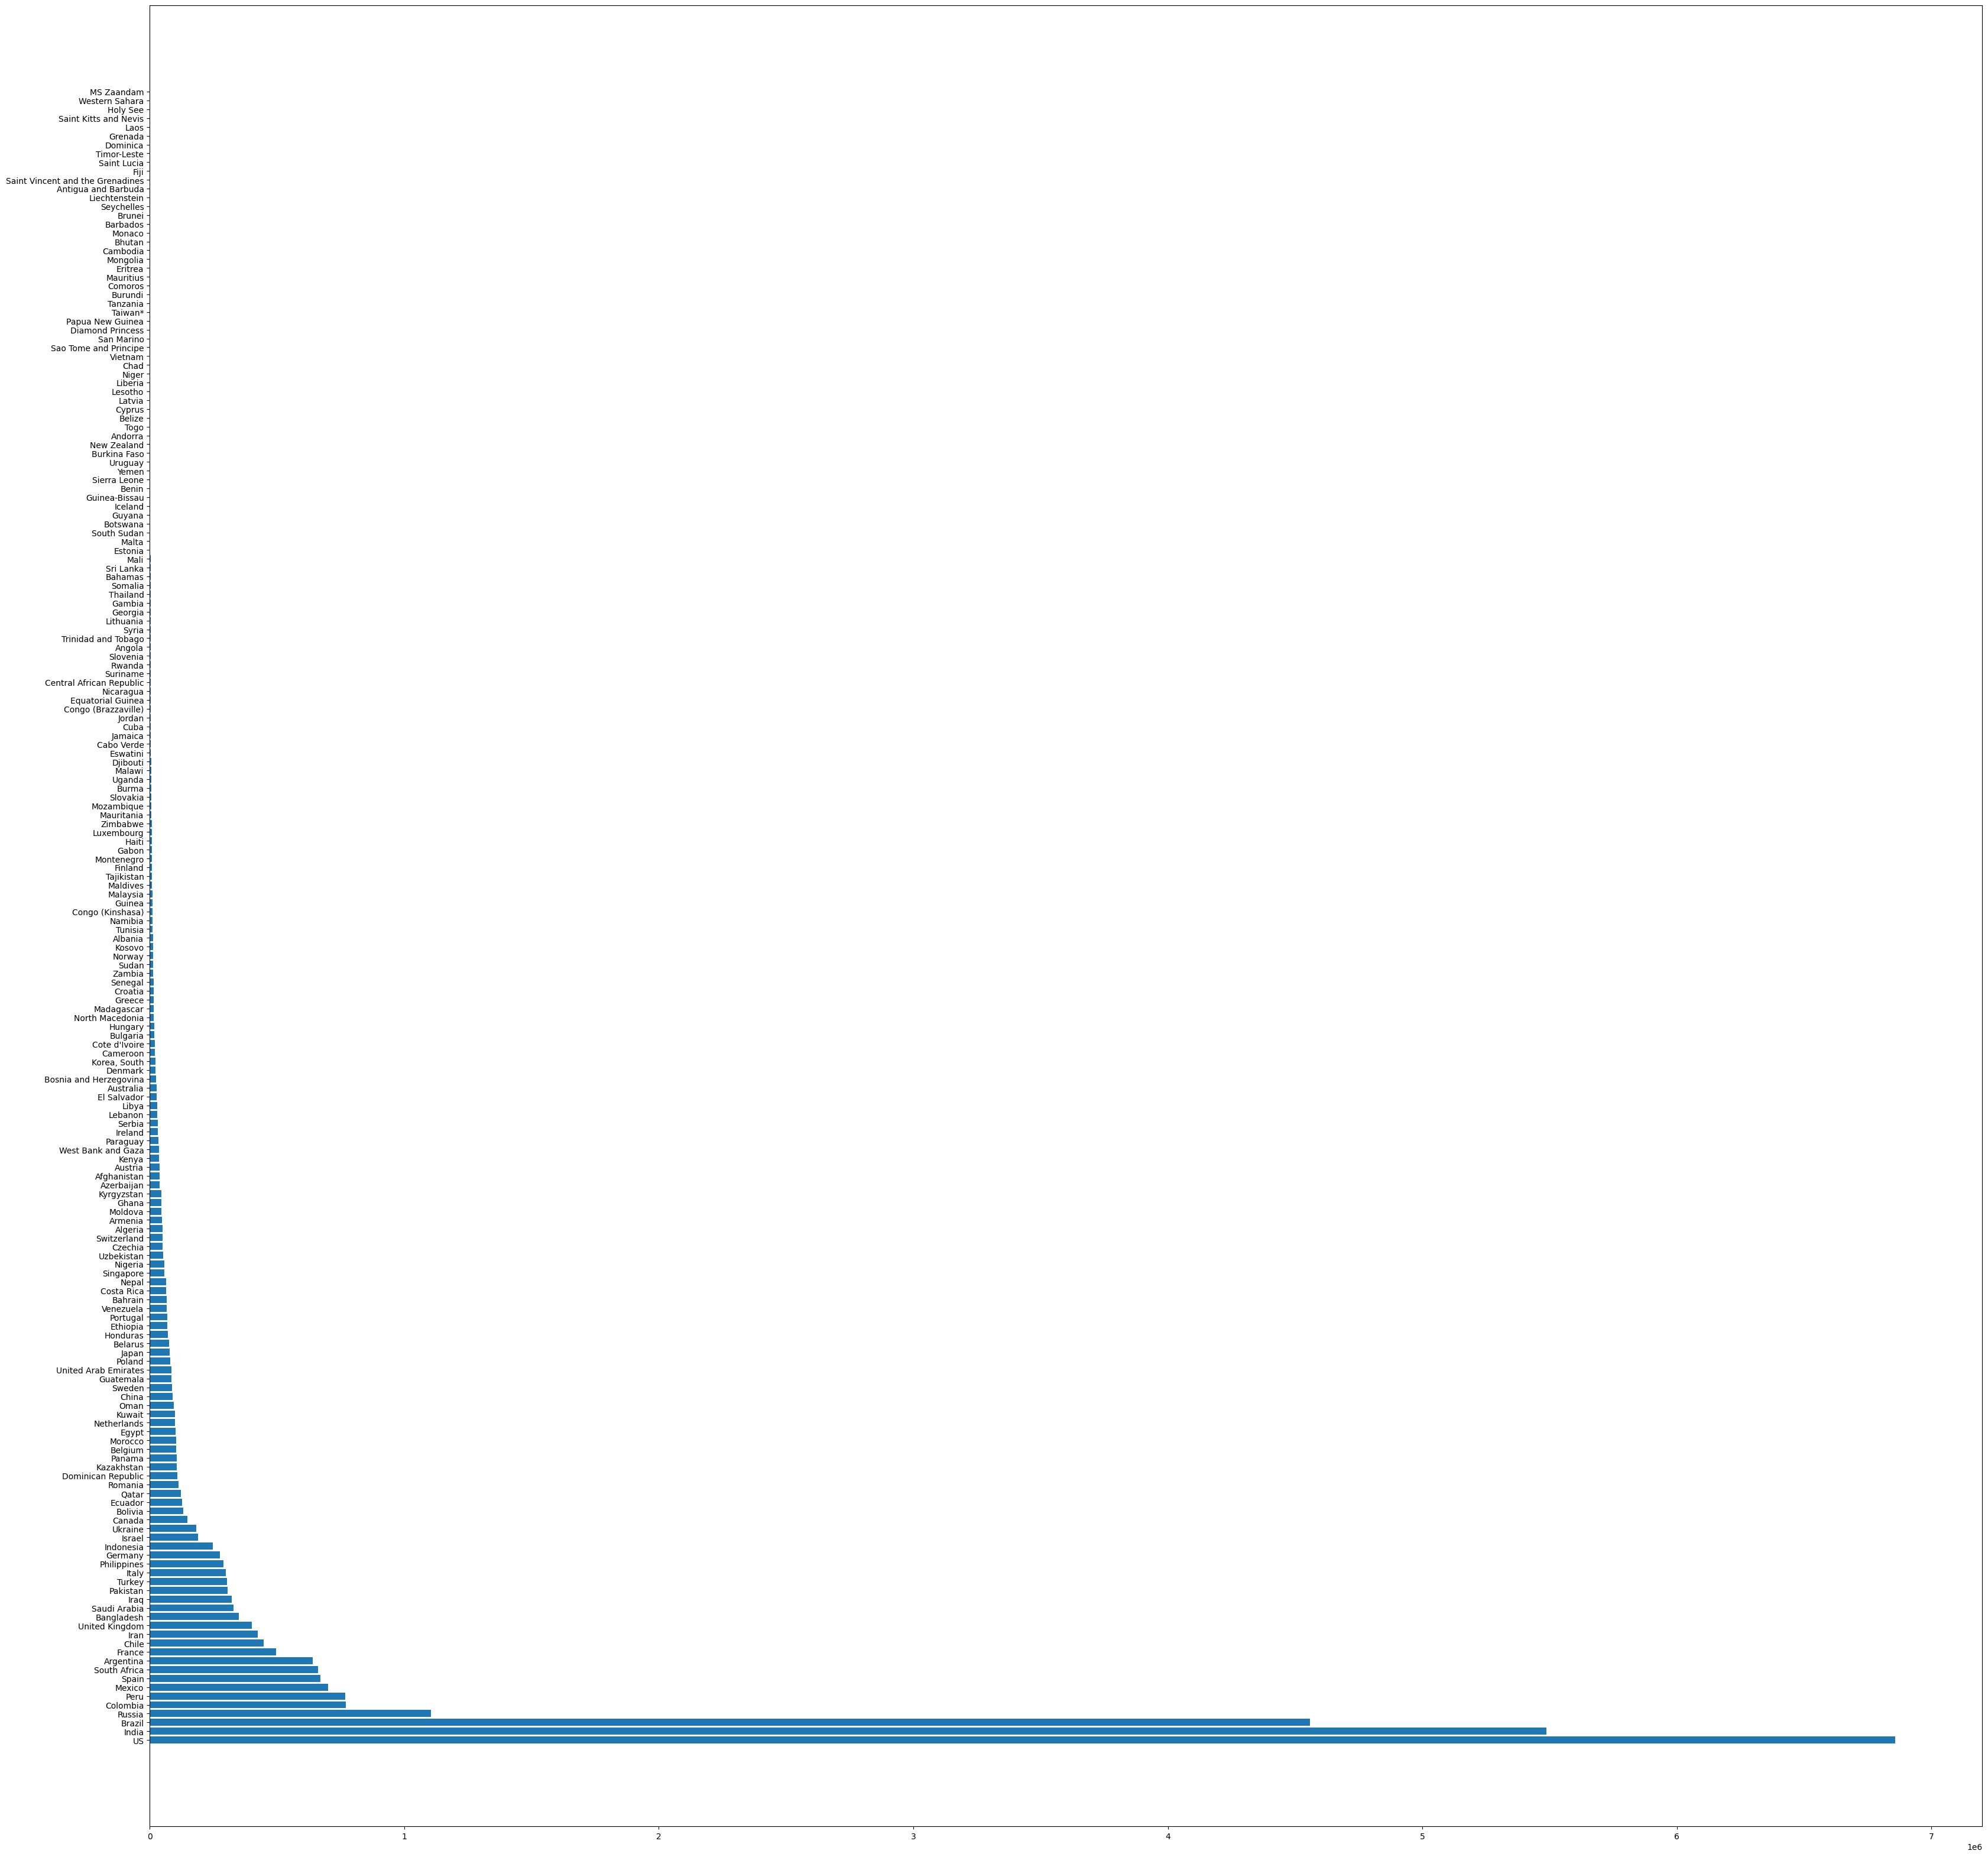

In [50]:
plt.figure(figsize=(40,40)) # canvas Size
plt.barh(Unique_Country,country_comfirmed_case) # ploting plot graph of Unique_Country,country_comfirmed_case
plt.show()

### Insights

* US having highest cases in the world
* India having second highest case in the world
* Brazil having third highest case in the world

In [51]:
visual_unique_countries = []                 # creating emply list
visual_comfirmed_cases = []                    # creating empty list
others = np.sum(country_comfirmed_case[10:])          # put total of country comfirm case in other
for i in range(len(country_comfirmed_case[:10])):            # running loop
    visual_unique_countries.append(Unique_Country[i])     # appending unique country name in visual unique for visualize
    visual_comfirmed_cases.append(country_comfirmed_case[i]) # appending country case in visual comfirmed for visualize
     
visual_comfirmed_cases.append(others)      # appending other in visual_comfirmed case
visual_unique_countries.append("other")     # appending others in visual unique countries


Text(0.5, 1.0, 'Top 10 Country affected by COVID-19')

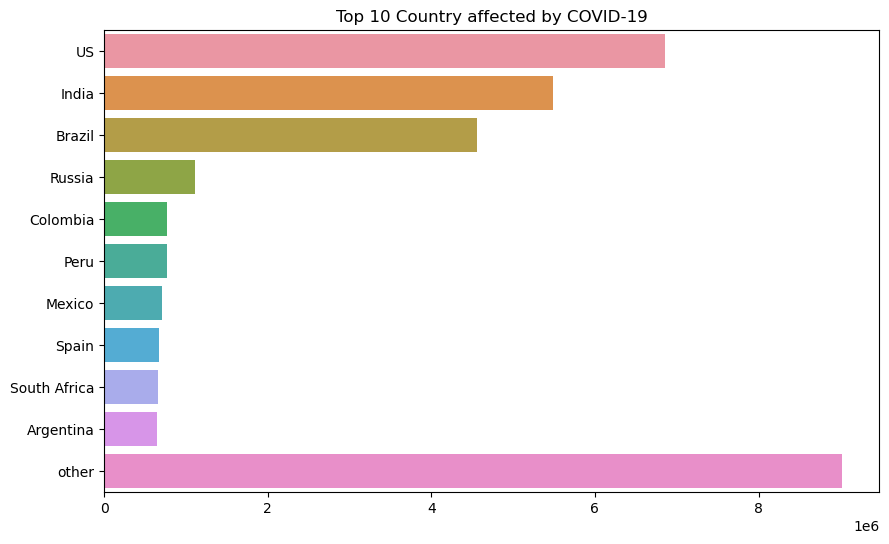

In [52]:
plt.figure(figsize=(10,6))# canvas Size
sns.barplot(y=visual_unique_countries,x=visual_comfirmed_cases)   # assign barplot for visualize
plt.title("Top 10 Country affected by COVID-19")         # put name of graph using plt.title

#### Insights

* US is the highest affected by COVID-19

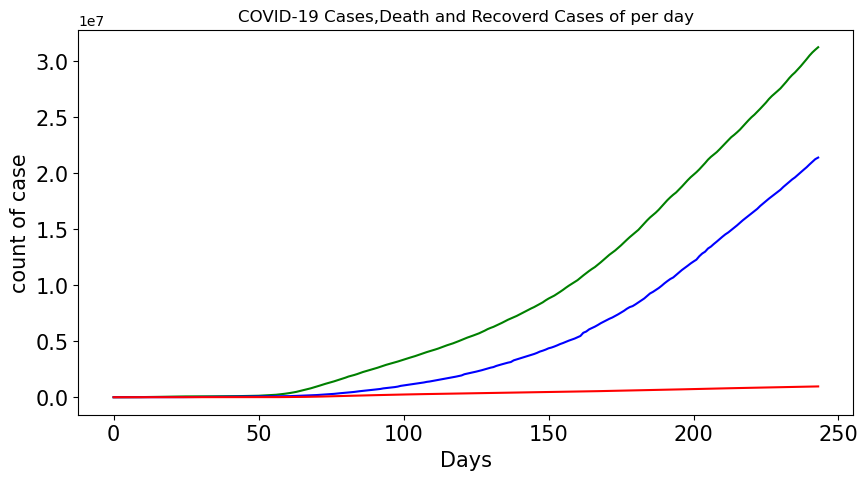

In [53]:
#ploting the case (comfirmed,recover and deaths) with time
plt.figure(figsize=(10,5))# canvas Size
plt.plot(days_date,world_case,color="green")    # assigh plot 
plt.plot(days_date,Recover_case,color="blue")   # assigh plot 
plt.plot(days_date,Death_case,color="red")    # assigh plot 
plt.title("COVID-19 Cases,Death and Recoverd Cases of per day")   # put name of graph using plt.title
plt.xlabel("Days",size=15)    # put name and fixed size of x_label
plt.ylabel("count of case",size=15)     # put name and fixed size of y_label
plt.yticks(size=15)    #fixed size of y_ticks
plt.xticks(size=15)     #fixed size of x_ticks
plt.show()

#### Insights

* we can see here COVID-19 cases of per day,Recoverd case and Death case are fully similar to the 50 days after they         started increaseing.
* we can see here Comfirmed cases has taken pick within 243 days.
* we can also see Recovery cases has almost same to Comfirmed cases.
* we can see here different between comfirmed cases and recovery cases are our death cases.
* According to Comfirmed cases and Recovery cases Death cases are low which are good for our country.

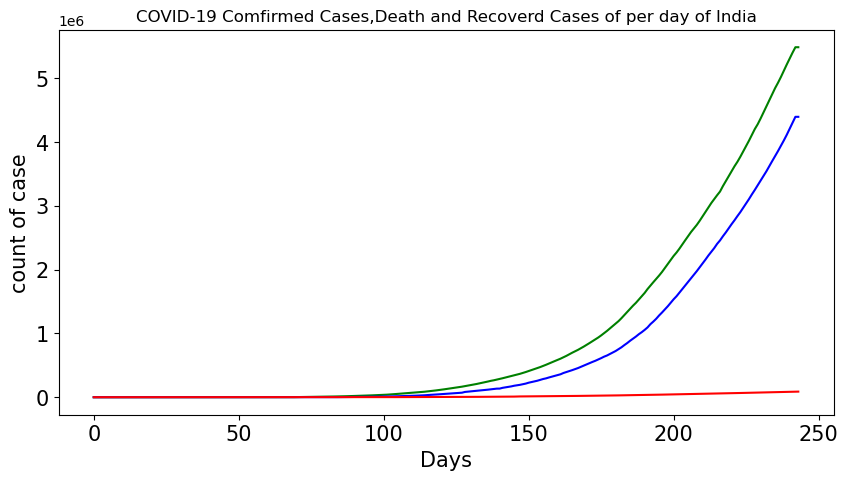

In [54]:
#ploting the case (comfirmed,recover and deaths) with time
plt.figure(figsize=(10,5))# canvas Size
plt.plot(days_date,India_case,color="green")        # assigh plot 
plt.plot(days_date,India_recoverd,color="blue")         # assigh plot 
plt.plot(days_date,India_death,color="red")           # assigh plot 
plt.title("COVID-19 Comfirmed Cases,Death and Recoverd Cases of per day of India")      # put name of graph using plt.title
plt.xlabel("Days",size=15)          #  put name and fixed size of x_label
plt.ylabel("count of case",size=15)     # put name and fixed size of y_label
plt.yticks(size=15)             #fixed size of y_ticks
plt.xticks(size=15)              #fixed size of x_ticks
plt.show()

#### Insights

* we can see here COVID-19 cases of per day of India,Recoverd case and Death case are fully similar to the 100 days after     they started increaseing.
* we can see here Comfirmed cases has taken pick within 243 days.
* we can also see Recovery cases has almost same to Comfirmed cases.
* we can see here different between comfirmed cases and recovery cases of India are our Death cases.
* According to Comfirmed cases and Recovery cases Death cases are low which are good for our India.

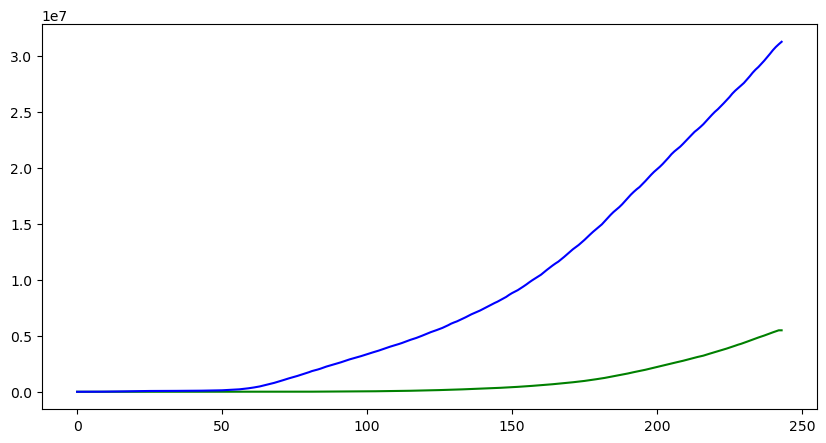

In [55]:
plt.figure(figsize=(10,5))# canvas Size
plt.plot(days_date,India_case,color="green")       # assign plot
plt.plot(days_date,world_case,color="blue")             # assign plot

#### Insights

* According to the graph world are affected very fast and India we can see after 100 days COVID-19 started affecting India and its increasing day by day

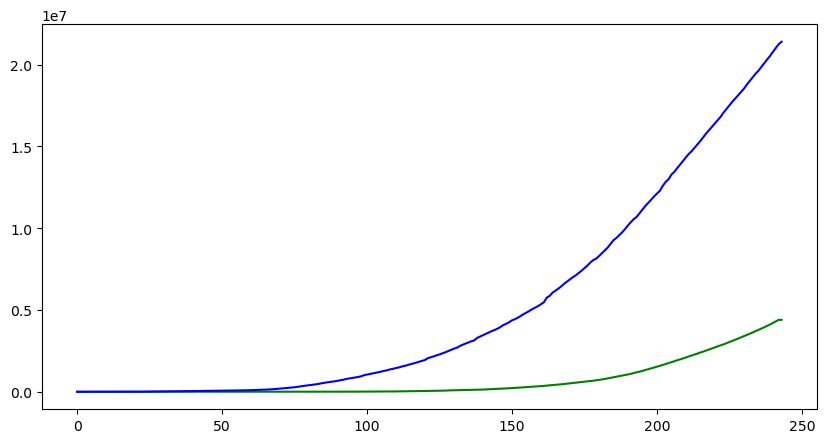

In [56]:
plt.figure(figsize=(10,5))# canvas Size
plt.plot(days_date,India_recoverd,color="green")   # assighn plot
plt.plot(days_date,Recover_case,color="blue")       # assign plot

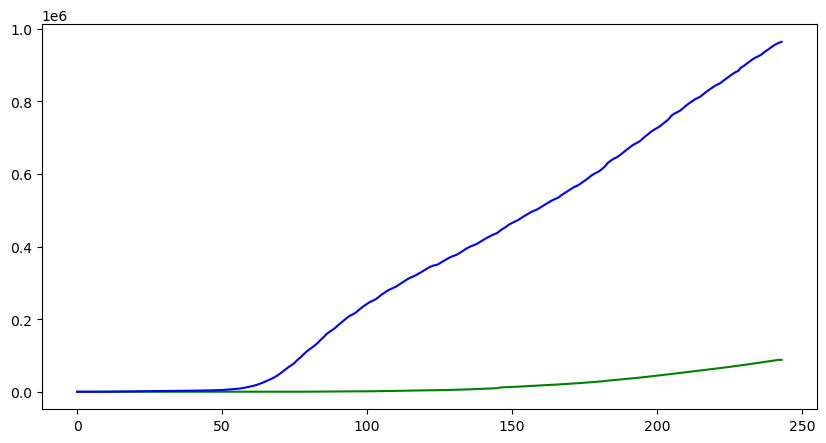

In [57]:
plt.figure(figsize=(10,5)) # canvas Size
plt.plot(days_date,India_death,color="green")    #ploting plot graph of days and india case
plt.plot(days_date,Death_case,color="blue")          #ploting plot graph of days and india death case

# Final Conclusions of Insights


* US is the highest affected by COVID-19
* India having second highest case in the world
* Brazil having third highest case in the world
* COVID-19 world cases of per day,Recoverd case and Death case are fully similar to the 50 days after they started           increaseing.
* World Comfirmed cases has taken pick within 243 days.
* World Recovery cases has almost same to World Comfirmed cases.
* Here different between World Comfirmed cases and World Recovery cases are our Death cases.
* According to World Comfirmed cases and World Recovery cases World Death cases are low which are good for World.
* COVID-19 cases of per day of India,Recoverd case and Death case are fully similar to the 100 days after they started       increaseing and it has taken pick within 243 days.
* India Recovery cases has almost same to India Comfirmed cases.
* Here different between India Comfirmed cases and India Recovery cases of India are our Death cases.
* According to Comfirmed cases and Recovery cases Death cases are low which are good for our India.
* According to the graph world are affected very fast and India we can see after 100 days COVID-19 started affecting India   and its increasing day by day

# feature Selection

* Here our dates are independent variable and Comfirmed cases,Death cases and Recoverd cases of World and India are our       dependent variable. 

In [58]:
world_case = np.array(world_case).reshape(-1,1)        # reshaping the world case and put in variable
total_death = np.array(Death_case).reshape(-1,1)           # reshaping the total death case and put in variable
total_recoverd = np.array(Recover_case).reshape(-1,1)      # reshaping the total recoverd case and put in variable
india_case = np.array(India_case).reshape(-1,1)           # reshaping the india case case and put in variable
india_death = np.array(India_death).reshape(-1,1)            # reshaping the india death case and put in variable
india_recoverd = np.array(India_recoverd).reshape(-1,1)          # reshaping the india recovered case and put in variable
days = np.array(days_date).reshape(-1,1)                      # reshaping the days and put in variable
print(days.shape)                                            # print shape of days

(244, 1)


In [59]:
print(total_death)

[[    17]
 [    18]
 [    26]
 [    42]
 [    56]
 [    82]
 [   131]
 [   133]
 [   171]
 [   213]
 [   259]
 [   362]
 [   426]
 [   492]
 [   564]
 [   634]
 [   719]
 [   806]
 [   906]
 [  1013]
 [  1113]
 [  1118]
 [  1371]
 [  1523]
 [  1666]
 [  1770]
 [  1868]
 [  2008]
 [  2123]
 [  2248]
 [  2252]
 [  2459]
 [  2470]
 [  2630]
 [  2710]
 [  2771]
 [  2814]
 [  2873]
 [  2942]
 [  2996]
 [  3085]
 [  3160]
 [  3255]
 [  3348]
 [  3460]
 [  3559]
 [  3803]
 [  3987]
 [  4267]
 [  4611]
 [  4917]
 [  5414]
 [  5834]
 [  6475]
 [  7153]
 [  7964]
 [  8867]
 [  9981]
 [ 11460]
 [ 13180]
 [ 14854]
 [ 16797]
 [ 19079]
 [ 21877]
 [ 24893]
 [ 28388]
 [ 32102]
 [ 35572]
 [ 39620]
 [ 44365]
 [ 49863]
 [ 56101]
 [ 62205]
 [ 68351]
 [ 73540]
 [ 79481]
 [ 87712]
 [ 94464]
 [102237]
 [109629]
 [115854]
 [121671]
 [127587]
 [134567]
 [142918]
 [150221]
 [158588]
 [164601]
 [169862]
 [175726]
 [182917]
 [189644]
 [196485]
 [203142]
 [208774]
 [212708]
 [217382]
 [223929]
 [230657]
 [236559]


In [60]:
world_case

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9926],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78981],
       [   79545],
       [   80398],
       [   81375],
       [   82735],
       [   84120],
       [   86013],
       [   88395],
       [   90372],
       [   92957],
       [   95272],
       [   98028],
       [  102018],
       [  106036],
       [  109993],
       [  113946],
       [  118967],
       [  126675],
       [  132450],
       [  146783],
       [  15

In [61]:
total_recoverd

array([[      28],
       [      30],
       [      36],
       [      39],
       [      52],
       [      61],
       [     107],
       [     126],
       [     143],
       [     222],
       [     284],
       [     472],
       [     623],
       [     852],
       [    1124],
       [    1487],
       [    2011],
       [    2616],
       [    3244],
       [    3946],
       [    4683],
       [    5150],
       [    6295],
       [    8058],
       [    9395],
       [   10865],
       [   12583],
       [   14352],
       [   16121],
       [   18177],
       [   18890],
       [   22886],
       [   23394],
       [   25227],
       [   27905],
       [   30384],
       [   33277],
       [   36711],
       [   39782],
       [   42716],
       [   45602],
       [   48228],
       [   51170],
       [   53796],
       [   55865],
       [   58359],
       [   60694],
       [   62493],
       [   64404],
       [   67002],
       [   68324],
       [   70251],
       [   7

In [62]:
india_case

array([[      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      1],
       [      1],
       [      1],
       [      2],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      5],
       [      5],
       [     28],
       [     30],
       [     31],
       [     34],
       [     39],
       [     43],
       [     56],
       [     62],
       [     73],
       [     82],
       [    102],
       [    113],
       [    119],
       [  

In [63]:
india_death

array([[    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    1],
       [    1],
       [    2],
       [    2],
       [    2],
       [    2],
       [    3],
       [    3],
       [    4],
       [    5],
       [    4],
       [    7],
       [   10],
       [

In [64]:
india_recoverd

array([[      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      4],
       [      4],
       [      4],
       [      4],
       [      4],
       [     13],
       [     13],
       [  

# Model selection

In [65]:
from sklearn.model_selection import train_test_split    # import train test split
x_train_world_comfirmed,x_test_world_comfirmed,y_train_world_comfirmed,y_test_world_comfirmed = train_test_split(days,world_case,random_state=0,test_size=0.25)

In [66]:
x_train_world_comfirmed

array([[171],
       [ 89],
       [157],
       [219],
       [234],
       [205],
       [237],
       [ 16],
       [ 90],
       [101],
       [ 75],
       [  4],
       [109],
       [ 61],
       [146],
       [ 52],
       [ 66],
       [ 26],
       [134],
       [135],
       [217],
       [ 40],
       [ 13],
       [  3],
       [152],
       [ 24],
       [ 30],
       [218],
       [ 60],
       [ 56],
       [179],
       [214],
       [ 19],
       [182],
       [129],
       [ 54],
       [238],
       [ 80],
       [ 51],
       [123],
       [201],
       [130],
       [ 86],
       [ 10],
       [137],
       [173],
       [126],
       [ 41],
       [ 14],
       [ 27],
       [ 50],
       [221],
       [ 20],
       [162],
       [ 46],
       [166],
       [239],
       [160],
       [170],
       [ 62],
       [190],
       [159],
       [  2],
       [ 59],
       [149],
       [227],
       [ 43],
       [191],
       [139],
       [154],
       [112],
      

In [67]:
x_test_world_comfirmed

array([[ 64],
       [ 63],
       [ 55],
       [111],
       [225],
       [ 92],
       [ 76],
       [181],
       [188],
       [180],
       [ 73],
       [107],
       [150],
       [198],
       [224],
       [ 44],
       [145],
       [110],
       [243],
       [189],
       [210],
       [104],
       [138],
       [  8],
       [199],
       [203],
       [220],
       [125],
       [  5],
       [ 22],
       [ 74],
       [124],
       [ 12],
       [168],
       [ 45],
       [158],
       [ 37],
       [136],
       [212],
       [223],
       [222],
       [118],
       [231],
       [155],
       [209],
       [ 18],
       [108],
       [ 15],
       [ 71],
       [  7],
       [ 83],
       [176],
       [106],
       [156],
       [178],
       [ 97],
       [116],
       [ 33],
       [122],
       [161],
       [ 96]])

In [68]:
y_test_world_comfirmed

array([[  539069],
       [  476680],
       [  199391],
       [ 4265367],
       [26304856],
       [ 2720583],
       [ 1415186],
       [14944726],
       [16736727],
       [14710995],
       [ 1193711],
       [ 3943470],
       [ 8806595],
       [19374812],
       [26031410],
       [  102018],
       [ 8044663],
       [ 4181640],
       [31245797],
       [17025889],
       [22408212],
       [ 3672660],
       [ 7130092],
       [    8234],
       [19634542],
       [20618174],
       [24996456],
       [ 5598982],
       [    2927],
       [   60381],
       [ 1265377],
       [ 5506311],
       [   19887],
       [12043466],
       [  106036],
       [10119644],
       [   84120],
       [ 6915760],
       [22946050],
       [25749642],
       [25484767],
       [ 4902461],
       [27862680],
       [ 9587195],
       [22134679],
       [   40159],
       [ 4029169],
       [   30802],
       [ 1030010],
       [    6166],
       [ 1986284],
       [13810459],
       [ 385

In [69]:
y_train_world_comfirmed

array([[12720381],
       [ 2479522],
       [ 9957498],
       [24734448],
       [28758945],
       [21208474],
       [29557942],
       [   34395],
       [ 2554727],
       [ 3438689],
       [ 1338067],
       [    2118],
       [ 4105292],
       [  384630],
       [ 8186473],
       [  157801],
       [  671653],
       [   73269],
       [ 6649014],
       [ 6779972],
       [24173746],
       [   90372],
       [   23898],
       [    1434],
       [ 9073260],
       [   69050],
       [   76840],
       [24452944],
       [  341784],
       [  218683],
       [14504853],
       [23417506],
       [   42768],
       [15225164],
       [ 6080002],
       [  183677],
       [29861949],
       [ 1749872],
       [  146783],
       [ 5419242],
       [20086280],
       [ 6187396],
       [ 2251672],
       [   12038],
       [ 7027674],
       [13105192],
       [ 5701734],
       [   92957],
       [   27643],
       [   75151],
       [  132450],
       [25222709],
       [   4

# Model Creation
# LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression                        # import LinearRegression
from sklearn.preprocessing import PolynomialFeatures                         # import PolynomialFeatures
poly = PolynomialFeatures(degree=3)                                              # put in variable PolynomialFeatures
poly_x_train_comfirmed = poly.fit_transform(x_train_world_comfirmed)           # # fit the x_train and put in variable
poly_x_test_comfirmed = poly.fit_transform(x_test_world_comfirmed)                  # fit the x_test and put in variable

In [71]:
Lr = LinearRegression()                                      # put in variable LinearRegression
Lr.fit(poly_x_train_comfirmed,y_train_world_comfirmed)       # fit the model

LinearRegression()

In [72]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error     # import model performance testing

In [73]:
y_predict = Lr.predict(poly_x_test_comfirmed)     # predicting the testing model

In [74]:
mean_squared_error(y_test_world_comfirmed,y_predict)   # checking MSE

67151006627.27857

In [75]:
mean_absolute_error(y_test_world_comfirmed,y_predict)   # checking MAE

208708.8257290106

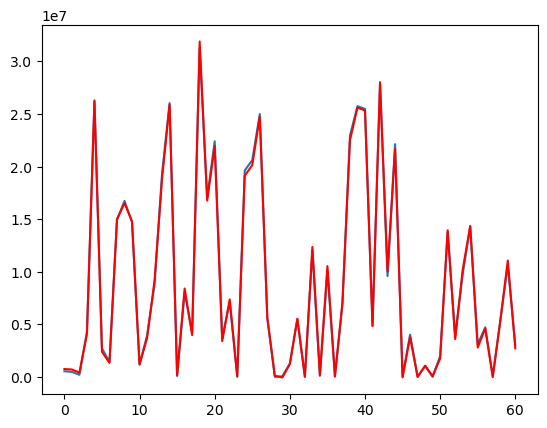

In [76]:
# checking how model is working using plot
plt.plot(y_test_world_comfirmed)
plt.plot(y_predict,color="red")

In [77]:
r2_score(y_test_world_comfirmed,y_predict)        # checking r2 score

0.9992035670938272

In [78]:
Score = r2_score(y_test_world_comfirmed,y_predict)        # put r2 score in variable

In [79]:
x_predict = Lr.predict(poly_x_train_comfirmed)             # predicting the training model

In [80]:
print("Train R2_score :",r2_score(y_train_world_comfirmed,x_predict))        # training score
print("Test R2_score :",r2_score(y_test_world_comfirmed,y_predict))       # testing score

Train R2_score : 0.999243668100105
Test R2_score : 0.9992035670938272


In [81]:
# create x_train,y_train,x_test,y_test for training and testing the model
x_train_world_death_comfirmed,x_test_world_death_comfirmed,y_train_world_death_comfirmed,y_test_world_death_comfirmed = train_test_split(days,Death_case,random_state=0,test_size=0.25)

In [82]:
poly_x_train_death_comfirmed = poly.fit_transform(x_train_world_death_comfirmed)   # fit the x_train and put in variable
poly_x_test_death_comfirmed = poly.fit_transform(x_test_world_death_comfirmed)    # fit the x_test and put in variable

In [83]:
Lr.fit(poly_x_train_death_comfirmed,y_train_world_death_comfirmed)    #fitting the model

LinearRegression()

In [84]:
y_death_predict = Lr.predict(poly_x_test_death_comfirmed)                  # predicting the model
print(mean_squared_error(y_test_world_death_comfirmed,y_death_predict))     # checking MSE
print(mean_absolute_error(y_test_world_death_comfirmed,y_death_predict))    # checking MAE

481731932.648983
17890.80335857175


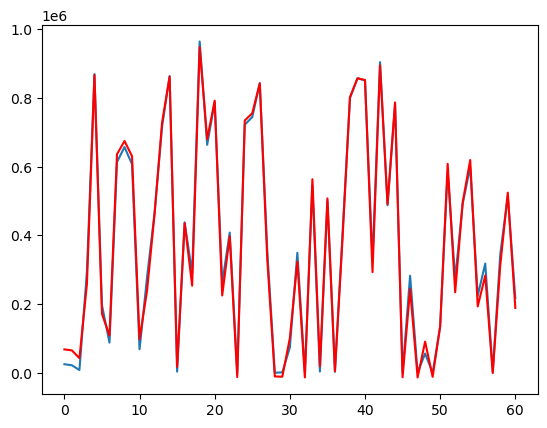

In [85]:
# checking how model is working using plot
plt.plot(y_test_world_death_comfirmed)
plt.plot(y_death_predict,color="red")

In [86]:
#r2_score(y_test_world_death_comfirmed,y_death_predict)                    # checking r2 score
r2_score_2 = r2_score(y_test_world_death_comfirmed,y_death_predict)    # put r2 score in variable

In [87]:
x_death_predict = Lr.predict(poly_x_train_death_comfirmed)    # predicting the training model

In [88]:
print("Train R2_score :",r2_score(y_train_world_death_comfirmed,x_death_predict))   # training score
print("Test R2_score :",r2_score(y_test_world_death_comfirmed,y_death_predict))     # testing score

Train R2_score : 0.9959119078366689
Test R2_score : 0.99477940207045


In [89]:
# create x_train,y_train,x_test,y_test for training and testing the model

x_train_india_case_comfirmed,x_test_india_case_comfirmed,y_train_india_case_comfirmed,y_test_india_case_comfirmed = train_test_split(days,india_case,random_state=0,test_size=0.25)

In [90]:
poly_x_train_india_case_comfirmed = poly.fit_transform(x_train_india_case_comfirmed)   # fit x_train and put in variable
poly_x_test_india_case_comfirmed = poly.fit_transform(x_test_india_case_comfirmed)      #fit x_test and put in variable

In [91]:
Lr.fit(poly_x_train_india_case_comfirmed,y_train_india_case_comfirmed)   # fitting the model

LinearRegression()

In [92]:
y_india_case_predict = Lr.predict(poly_x_test_india_case_comfirmed)            # predicting testing model
print(mean_squared_error(y_test_india_case_comfirmed,y_india_case_predict))        # checking MSE
print(mean_absolute_error(y_test_india_case_comfirmed,y_india_case_predict))        # checking MAE

3885110037.266913
51207.01478803616


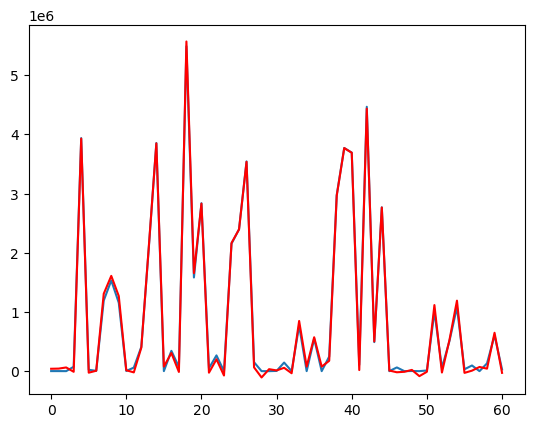

In [93]:
# checking how model is working using plot
plt.plot(y_test_india_case_comfirmed)
plt.plot(y_india_case_predict,color="red")

In [94]:
r2_score(y_test_india_case_comfirmed,y_india_case_predict)                    # checking r2 score

0.998012518760011

In [95]:
x_india_case_predict = Lr.predict(poly_x_train_india_case_comfirmed)    # predicting training score

In [96]:
print("Train R2_score :",r2_score(y_train_india_case_comfirmed,x_india_case_predict))  # training score
print("Test R2_score :",r2_score(y_test_india_case_comfirmed,y_india_case_predict))     # testing score

Train R2_score : 0.99823026425284
Test R2_score : 0.998012518760011


In [97]:
r2_score_3 = r2_score(y_test_india_case_comfirmed,y_india_case_predict)   # put r2 score in variable

# KNN MODEL

In [98]:
from sklearn.neighbors import KNeighborsRegressor   # importing KNN Regressor
Knn = KNeighborsRegressor()                         # put in variable

In [99]:
from sklearn.model_selection import train_test_split  # assign train test split using sklearn

# create x_train,y_train,x_test,y_test for training and testing the model
x_train_world_comfirmed,x_test_world_comfirmed,y_train_world_comfirmed,y_test_world_comfirmed = train_test_split(days,world_case,random_state=0,test_size=0.25)

In [100]:
Knn.fit(x_train_world_comfirmed,y_train_world_comfirmed)    # fitting the model

KNeighborsRegressor()

In [101]:
knn = Knn.predict(x_test_world_comfirmed)    # predicting the model

In [102]:
r2_score1 = r2_score(y_test_world_comfirmed,knn)   # put r2 score in variable
r2_score(y_test_world_comfirmed,knn)                # checking r2 score 

0.9996214082273627

In [103]:
knn_x_predict = Knn.predict(x_train_world_comfirmed)    # predicting the training model

In [104]:
print("Train R2_score :",r2_score(y_train_world_comfirmed,knn_x_predict))  # train score
print("Test R2_score :",r2_score(y_test_world_comfirmed,knn))              # test score

Train R2_score : 0.9998447924659523
Test R2_score : 0.9996214082273627


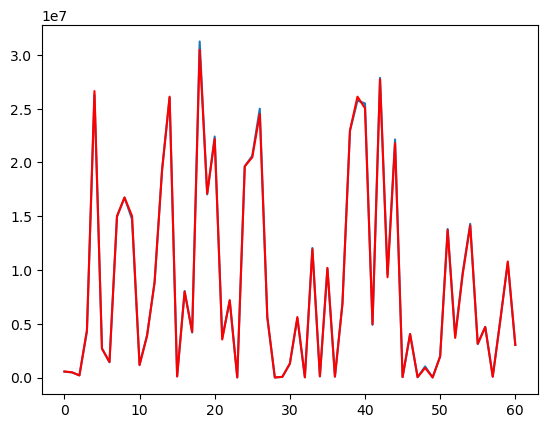

In [105]:
# checking how model is working using plot
plt.plot(y_test_world_comfirmed)
plt.plot(knn,color="red")

#### Fitting and Predicting world death case with KNN

In [106]:
# create x_train,y_train,x_test,y_test for training and testing the model
x_train_world_death_comfirmed,x_test_world_death_comfirmed,y_train_world_death_comfirmed,y_test_world_death_comfirmed = train_test_split(days,Death_case,random_state=0,test_size=0.25)

In [107]:
Knn.fit(x_train_world_death_comfirmed,y_train_world_death_comfirmed)      # fit the model

KNeighborsRegressor()

In [108]:
knn1 = Knn.predict(x_test_world_death_comfirmed)                # predicting the model
knn_x_predict1 = Knn.predict(x_train_world_death_comfirmed)      # predicting the train model
r2_score1_2 = r2_score(y_test_world_death_comfirmed,knn1)           # put r2 score in variable
r2_score(y_test_world_death_comfirmed,knn1)                     # checking r2 score

0.9997591414240096

In [109]:
print("Train R2_score :",r2_score(y_train_world_death_comfirmed,knn_x_predict1))   # training score
print("Test R2_score :",r2_score(y_test_world_death_comfirmed,knn1))               # testing score

Train R2_score : 0.9998895598173803
Test R2_score : 0.9997591414240096


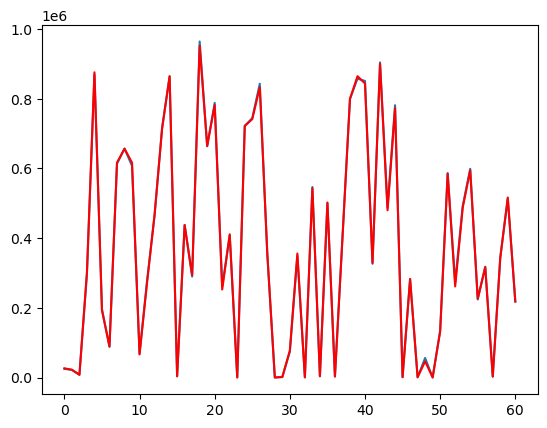

In [110]:
# checking how model is working using plot
plt.plot(y_test_world_death_comfirmed)
plt.plot(knn1,color="red")

#### Fitting model and predicting india case with KNN

In [111]:
# create x_train,y_train,x_test,y_test for training and testing the model
x_train_india_case_comfirmed,x_test_india_case_comfirmed,y_train_india_case_comfirmed,y_test_india_case_comfirmed = train_test_split(days,india_case,random_state=0,test_size=0.25)

In [112]:
Knn.fit(x_train_india_case_comfirmed,y_train_india_case_comfirmed)   # fitting the model

KNeighborsRegressor()

In [113]:
knn2 = Knn.predict(x_test_india_case_comfirmed)               # predict the model
knn_x_predict2 = Knn.predict(x_train_india_case_comfirmed)          # predict the training model
r2_score1_3 = r2_score(y_test_india_case_comfirmed,knn2)             # put r2 score in variable
r2_score(y_test_india_case_comfirmed,knn2)                         # checking r2 score

0.9990100583183662

In [114]:
print("Train R2_score :",r2_score(y_train_india_case_comfirmed,knn_x_predict2))   # training score
print("Test R2_score :",r2_score(y_test_india_case_comfirmed,knn2))                 # testing score

Train R2_score : 0.9995668101198811
Test R2_score : 0.9990100583183662


# DecisionTreeRegressor

#### Fitting and Predicting world comfirm case with DecisionTreeRegressor

In [115]:
from sklearn.tree import DecisionTreeRegressor    #importing DecisionTreeRegressor
dr = DecisionTreeRegressor()                    # put model in variable
dr.fit(x_train_world_comfirmed,y_train_world_comfirmed) # fit the model

DecisionTreeRegressor()

In [116]:
dt = dr.predict(x_test_world_comfirmed)                   # predicting model
dt_x_predict = dr.predict(x_train_world_comfirmed)          # predicting the train model
r2_score2 = r2_score(y_test_world_comfirmed,dt)             # put r2 score in variable
r2_score(y_test_world_comfirmed,dt)                       # checking r2 score

0.9995706195276474

In [117]:
print("Train R2_score :",r2_score(y_train_world_comfirmed,dt_x_predict))         # training score
print("Test R2_score :",r2_score(y_test_world_comfirmed,dt))                     # testing score

Train R2_score : 1.0
Test R2_score : 0.9995706195276474


#### Fitting and Predicting world death case with DecisionTreeRegressor

In [118]:
dr.fit(x_train_world_death_comfirmed,y_train_world_death_comfirmed)    # fit the model

DecisionTreeRegressor()

In [119]:
dt1 = dr.predict(x_test_world_death_comfirmed)                 # predicting the model
dt_x_predict1 = dr.predict(x_train_world_death_comfirmed)       # predicting the train model
r2_score2_2 = r2_score(y_test_world_death_comfirmed,dt1)          # put r2 score in variable
r2_score(y_test_world_death_comfirmed,dt1)                      # checking r2 score

0.9997097416267137

In [120]:
print("Train R2_score :",r2_score(y_train_world_death_comfirmed,dt_x_predict1))  # training score
print("Test R2_score :",r2_score(y_test_world_death_comfirmed,dt1))                # testing score

Train R2_score : 1.0
Test R2_score : 0.9997097416267137


#### Fitting and Predicting india comfirm case with DecisionTreeRegressor

In [121]:
dr.fit(x_train_india_case_comfirmed,y_train_india_case_comfirmed)    # fitting the model
dt2 = Knn.predict(x_test_india_case_comfirmed)                       # predicting the testing model
dt_x_predict2 = Knn.predict(x_train_india_case_comfirmed)            # predicting the training model
r2_score2_3 = r2_score(y_test_india_case_comfirmed,dt2)               # put r2 score in variable
r2_score(y_test_india_case_comfirmed,dt2)                            # checking r2 score

0.9990100583183662

In [122]:
print("Train R2_score :",r2_score(y_train_india_case_comfirmed,dt_x_predict2))   # training score
print("Test R2_score :",r2_score(y_test_india_case_comfirmed,dt2))               # testing score

Train R2_score : 0.9995668101198811
Test R2_score : 0.9990100583183662


# RandomForestRegressor

#### Fitting and Predicting world comfirm case with RandomForestRegressor

In [123]:
from sklearn.ensemble import RandomForestRegressor            #importing RandomForestRegressor
rf = RandomForestRegressor()                                # put randomforestregressor in variable
rf.fit(x_train_world_comfirmed,y_train_world_comfirmed)       # fit the model

C:\Users\prash\AppData\Local\Temp\ipykernel_75236\3909296481.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_world_comfirmed,y_train_world_comfirmed)       # fit the model


RandomForestRegressor()

In [124]:
rfr = rf.predict(x_test_world_comfirmed)                   # predicting the testing model
rfr_x_predict = rf.predict(x_train_world_comfirmed)           # predicting the training model
r2_score3 = r2_score(y_test_world_comfirmed,rfr)            # put r2 score in variable
r2_score(y_test_world_comfirmed,rfr)                      # checking r2 score

0.9997792012708977

In [125]:
print("Train R2_score :",r2_score(y_train_world_comfirmed,rfr_x_predict))   # training score
print("Test R2_score :",r2_score(y_test_world_comfirmed,rfr))               # testing score

Train R2_score : 0.999979874351557
Test R2_score : 0.9997792012708977


#### Fitting and Predicting world death case with RandomForestRegressor

In [126]:
rf.fit(x_train_world_death_comfirmed,y_train_world_death_comfirmed)     # fitting the model

RandomForestRegressor()

In [127]:
rfr1 = rf.predict(x_test_world_death_comfirmed)                # predicting the model
rfr_x_predict1 = rf.predict(x_train_world_death_comfirmed)         # predicting the train model
r2_score3_2 = r2_score(y_test_world_death_comfirmed,rfr1)          # put r2 score in variable
r2_score(y_test_world_death_comfirmed,rfr1)                        # checking r2 score

0.9998660150145147

In [128]:
print("Train R2_score :",r2_score(y_train_world_death_comfirmed,rfr_x_predict1))  # training score
print("Test R2_score :",r2_score(y_test_world_death_comfirmed,rfr1))              # testing score

Train R2_score : 0.9999805100966175
Test R2_score : 0.9998660150145147


#### Fitting and Predicting world india comfirm case with RandomForestRegressor

In [129]:
rf.fit(x_train_india_case_comfirmed,y_train_india_case_comfirmed)     # fitting the model
rfr2 = Knn.predict(x_test_india_case_comfirmed)                       # predicting the model
rfr_x_predict2 = rf.predict(x_train_india_case_comfirmed)             # predicting the train model
r2_score3_3 = r2_score(y_test_india_case_comfirmed,rfr2)               # put r2 score in varibale
r2_score(y_test_india_case_comfirmed,rfr2)                            # chacking r2 score

C:\Users\prash\AppData\Local\Temp\ipykernel_75236\1273470220.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_india_case_comfirmed,y_train_india_case_comfirmed)     # fitting the model


0.9990100583183662

In [130]:
print("Train R2_score :",r2_score(y_train_india_case_comfirmed,rfr_x_predict2))   # training score 
print("Test R2_score :",r2_score(y_test_india_case_comfirmed,rfr2))               # testing score

Train R2_score : 0.9999364388337578
Test R2_score : 0.9990100583183662


### XGBoost

In [131]:
import xgboost as xg    #importing xgboost with alias name xg
from xgboost import XGBRegressor   #calling XGBRegressor
xgb = xg.XGBRegressor(objective ='reg:linear',    #assign in variable
                  n_estimators = 90, seed = 123)

#### Fitting and Predicting world comfirm case with XGBRegressor

In [132]:
xgb.fit(x_train_world_comfirmed,y_train_world_comfirmed)       # fitting the model

[14:02:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=90, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [133]:
xgbr = xgb.predict(x_test_world_comfirmed)               # predicting the model
xgbr_x_predict = xgb.predict(x_train_world_comfirmed)    # predicting the train model
r2_score4 = r2_score(y_test_world_comfirmed,xgbr)          # put r2 score in variable
r2_score(y_test_world_comfirmed,xgbr)                    # checking r2 score

0.9995658491624569

In [134]:
print("Train R2_score :",r2_score(y_train_world_comfirmed,xgbr_x_predict))     # training score
print("Test R2_score :",r2_score(y_test_world_comfirmed,xgbr))                # testing score

Train R2_score : 0.9999991159878112
Test R2_score : 0.9995658491624569


#### Fitting and Predicting world death case with XGBRegressor

In [135]:
xgb.fit(x_train_world_death_comfirmed,y_train_world_death_comfirmed)    # fitting the model

[14:02:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=90, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [136]:
xgbr1 = xgb.predict(x_test_world_death_comfirmed)                # predicting the model
xgbr_x_predict1 = xgb.predict(x_train_world_death_comfirmed)          # predicting the training model
r2_score4_2 = r2_score(y_test_world_death_comfirmed,xgbr1)               # put r2 score in new variable 
r2_score(y_test_world_death_comfirmed,xgbr1)                        # checking r2 score

0.9997130613284161

In [137]:
print("Train R2_score :",r2_score(y_train_world_death_comfirmed,xgbr_x_predict1))    # training score
print("Test R2_score :",r2_score(y_test_world_death_comfirmed,xgbr1))               # testing score

Train R2_score : 0.9999992666532477
Test R2_score : 0.9997130613284161


#### Fitting and Predicting india comfirm case with XGBRegressor

In [138]:
xgb.fit(x_train_india_case_comfirmed,y_train_india_case_comfirmed)   # fitting the model
xgbr2 = xgb.predict(x_test_india_case_comfirmed)                     # predicting the model
xgbr_x_predict2 = xgb.predict(x_train_india_case_comfirmed)           # predicting the train model 
r2_score4_3 = r2_score(y_test_india_case_comfirmed,xgbr2)             # put R2 score in variable
r2_score(y_test_india_case_comfirmed,xgbr2)                         # checking r2 score

[14:02:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


0.9990208266256988

In [139]:
print("Train R2_score :",r2_score(y_train_india_case_comfirmed,xgbr_x_predict2))   # training score 
print("Test R2_score :",r2_score(y_test_india_case_comfirmed,xgbr2))                 # testing score

Train R2_score : 0.9999990251328665
Test R2_score : 0.9990208266256988


# MLPRegressor

In [140]:
## model creation
from sklearn.neural_network import MLPRegressor  #importing MLPRegressor
model = MLPRegressor( hidden_layer_sizes=(800,300,100),
                       learning_rate_init=0.001,
                       max_iter=1500) ## model object creation max_iter=Stopping parameter

##### Fitting and Predicting world comfirm case with MLPRegressor

In [141]:
model.fit(x_train_world_comfirmed,y_train_world_comfirmed)  # fitting the model

C:\Users\prash\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(800, 300, 100), max_iter=1500)

In [142]:
ann = model.predict(x_test_world_comfirmed)                # predicting the model
ann_x_predict = model.predict(x_train_world_comfirmed)        # predicting the train model
r2_score5 = r2_score(y_test_world_comfirmed,ann)               # put r2 score in variable
r2_score(y_test_world_comfirmed,ann)                         # checking r2 score

0.7535020944510962

In [143]:
print("Train R2_score :",r2_score(y_train_world_comfirmed,ann_x_predict))   # checking train score
print("Test R2_score :",r2_score(y_test_world_comfirmed,ann))               # checking test score

Train R2_score : 0.763747724991628
Test R2_score : 0.7535020944510962


##### Fitting and Predicting world Daeth case with MLPRegressor

In [144]:
model.fit(x_train_world_death_comfirmed,y_train_world_death_comfirmed)   # fitting the model

MLPRegressor(hidden_layer_sizes=(800, 300, 100), max_iter=1500)

In [145]:
ann1 = model.predict(x_test_world_death_comfirmed)             # predicting the test model
ann_x_predict1 = model.predict(x_train_world_death_comfirmed)   # predicting the train model
r2_score5_2 = r2_score(y_test_world_death_comfirmed,ann1)          # put r2 score in variable
r2_score(y_test_world_death_comfirmed,ann1)                      # checking r2 score 

0.8794393606140156

In [146]:
print("Train R2_score :",r2_score(y_train_world_death_comfirmed,ann_x_predict1))   # training score
print("Test R2_score :",r2_score(y_test_world_death_comfirmed,ann1))                # testing score

Train R2_score : 0.8785450314674028
Test R2_score : 0.8794393606140156


#### Fitting and Predicting india comfirm case with MLPRegressor

In [147]:
model.fit(x_train_india_case_comfirmed,y_train_india_case_comfirmed)  # fitting the model
ann2 = model.predict(x_test_india_case_comfirmed)                     #predicting the model
ann_x_predict2 = model.predict(x_train_india_case_comfirmed)           # predicting the training model 
r2_score5_3 = r2_score(y_test_india_case_comfirmed,ann2)              # checking r2 score of model and put in varibale
r2_score(y_test_india_case_comfirmed,ann2)                               # checking r2 score

C:\Users\prash\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4949074757617937

In [148]:
print("Train R2_score :",r2_score(y_train_india_case_comfirmed,ann_x_predict2)) #training score
print("Test R2_score :",r2_score(y_test_india_case_comfirmed,ann2))  # testing score

Train R2_score : 0.5088716368714603
Test R2_score : 0.4949074757617937


# TIME SERIES

AR(Auto Regressive) Algorithmns of Time Series for world confirm case

In [149]:
#creating dataframe for forcasting
df = pd.DataFrame(world_case,columns=["world_confirm_case"])
df1 = pd.DataFrame(date,columns=["date"])

In [150]:
# adding two dataframe
data = pd.concat([df1,df],axis=1)
data

,date,world_confirm_case
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118
...,...,...
239,9/17/20,30175313
240,9/18/20,30499534
241,9/19/20,30780755
242,9/20/20,31021972


In [151]:
data["date"] = pd.to_datetime(data["date"])# change into datetime format

In [152]:
data.head()

,date,world_confirm_case
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [153]:
data = data.set_index('date')#set date columns into index
data

,world_confirm_case
date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-09-17,30175313
2020-09-18,30499534
2020-09-19,30780755


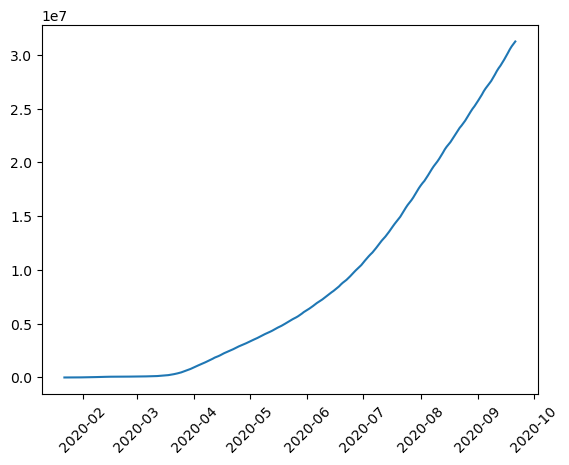

In [154]:
plt.plot(data) # ploting graph
plt.xticks(rotation=45) # rotate xticks into 90 degree
plt.show() # for showing graph

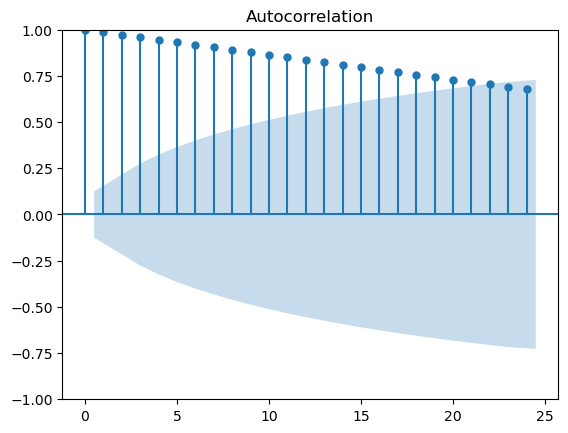

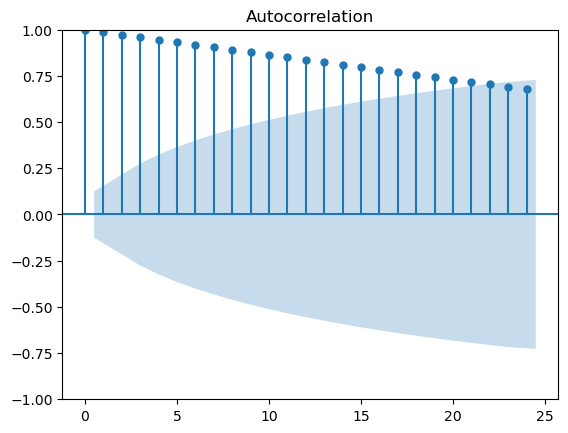

In [155]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

From the autocorrelation plot, it is clear that given series is not stationary.

We can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.

In [156]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.world_confirm_case, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.2614395009134955
2. P-Value :  0.646624071310336
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 228
5. Critical Values :
	 1% :  -3.4593607492757554
	 5% :  -2.8743015807562924
	 10% :  -2.5735714042782396


P-value is higher for our dataset, and we can say that the evidence of rejecting the null hypothesis is low; hence the time series is non-stationary. 

In [157]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [158]:
data1

,world_confirm_case
date,
2020-01-22,NaN
2020-01-23,99.0
2020-01-24,287.0
2020-01-25,493.0
2020-01-26,684.0
...,...
2020-09-17,313364.0
2020-09-18,324221.0
2020-09-19,281221.0


In [159]:
data1=data1.iloc[1:] #null value discarded
data1

,world_confirm_case
date,
2020-01-23,99.0
2020-01-24,287.0
2020-01-25,493.0
2020-01-26,684.0
2020-01-27,809.0
...,...
2020-09-17,313364.0
2020-09-18,324221.0
2020-09-19,281221.0


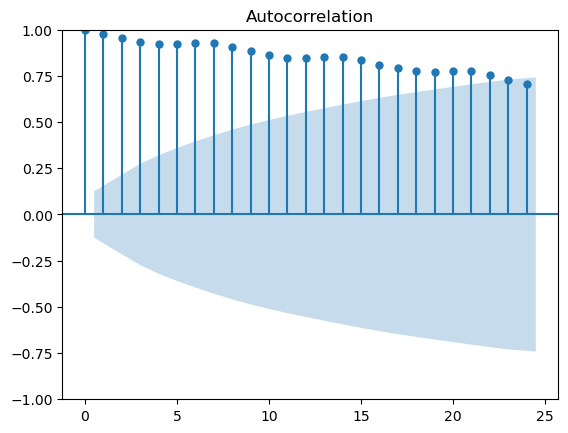

In [160]:
plot_acf(data1); # autocorrelation plot 

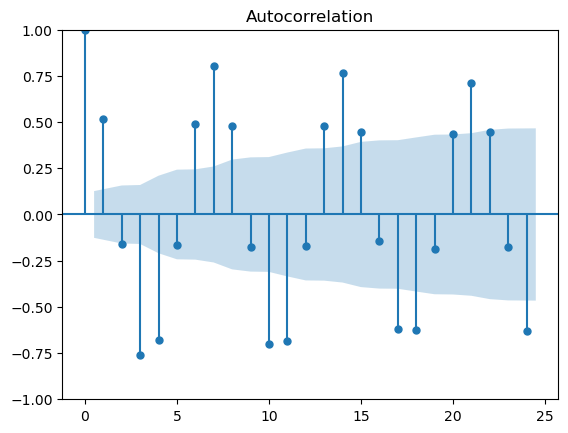

In [161]:
data2=data1.diff(periods=3) # differencing applied to data1
data2=data2.iloc[3:] # integrated to the order of 2
plot_acf(data2);

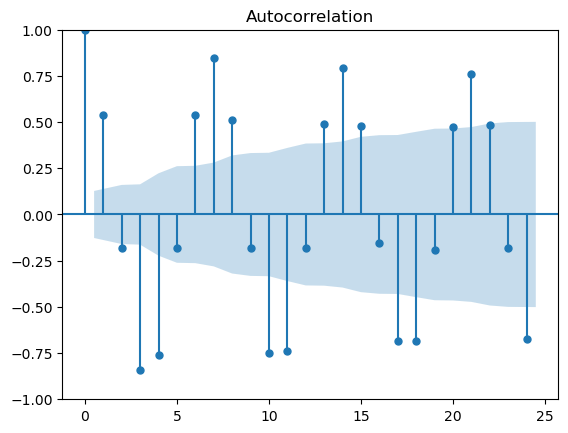

In [162]:
data3=data2.diff(periods=3) # differencing applied to data3
data4=data3.iloc[3:] # integrated to the order of 4
plot_acf(data4);

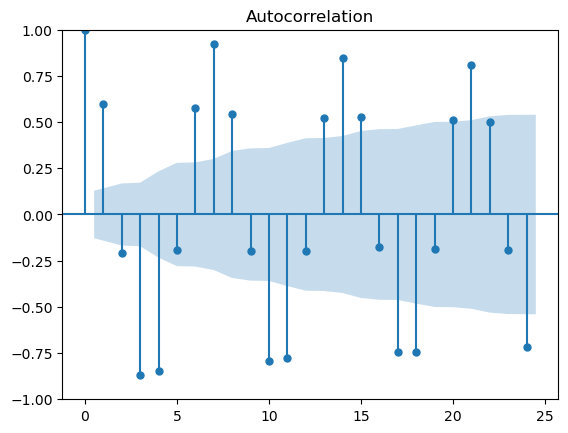

In [163]:
data5=data4.diff(periods=4) # differencing applied to data5
data6=data5.iloc[4:] # integrated to the order of 6
plot_acf(data6);

In [164]:
data6.shape#shape of the data rows and columns

(233, 1)

In [165]:
## Creating training and test sets
train=data6[:170] #from 0th row to 170th row - traning data
test=data6[170:] #from 170th row to end - testing data

In [166]:
train.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170 entries, 2020-02-02 to 2020-07-20
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   world_confirm_case  170 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


In [167]:
!pip install statsmodels
from statsmodels.tsa.ar_model import AutoReg

In [168]:
# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data6,maxlag=17,glob=True)
mod.ar_lags

C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 3, 4, 6, 8, 9, 11, 12, 15]

In [169]:
## model creation
ar_model=AutoReg(train,lags=[1, 3, 4, 6, 8, 9, 11, 12, 15]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [170]:
prediction=ar_model_fit.predict(start=170,end=232)

C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


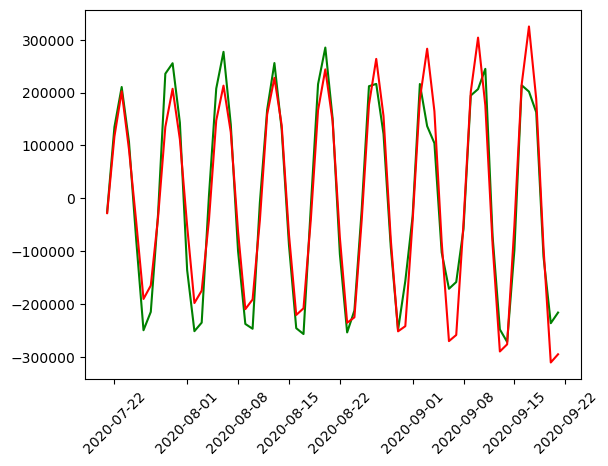

In [171]:
import matplotlib.pyplot as plt

plt.plot(test,color="green")
plt.plot(prediction,color='red') #graph of test vs prediction
plt.xticks(rotation=45)
plt.show()

In [172]:
r2_score(prediction,test) # r2score of prediction vs test

0.9214816983957077

In [173]:
tswcc = r2_score(prediction,test) # put r2 score in another variable

# AR(Auto Regressive) Algorithmns of Time Series for India case

In [174]:
# creating dataframe for forcasting
df = pd.DataFrame(india_case,columns=["ind_case"])
df1 = pd.DataFrame(date,columns=["date"])

In [175]:
# concat two dataframe
data = pd.concat([df1,df],axis=1)
data

,date,ind_case
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
239,9/17/20,5214677
240,9/18/20,5308014
241,9/19/20,5400619
242,9/20/20,5487580


In [176]:
data["date"] = pd.to_datetime(data["date"]) # change date into datetime
data = data.set_index('date')   # set date into index number
data

,ind_case
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-09-17,5214677
2020-09-18,5308014
2020-09-19,5400619


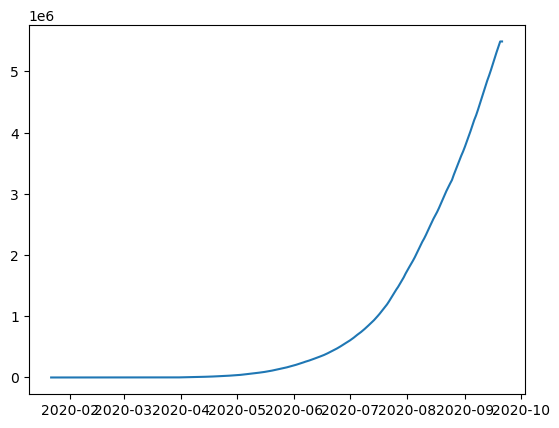

In [177]:
plt.plot(data) # ploting graph

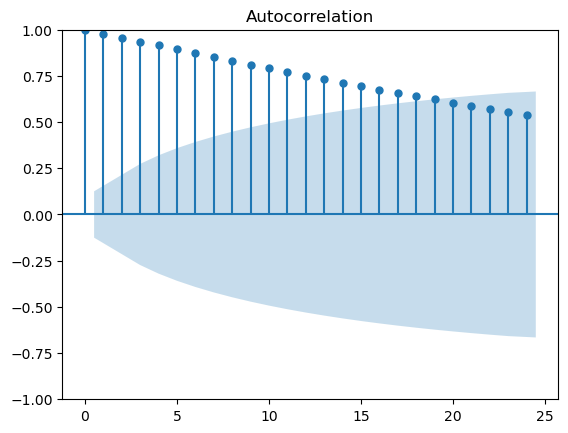

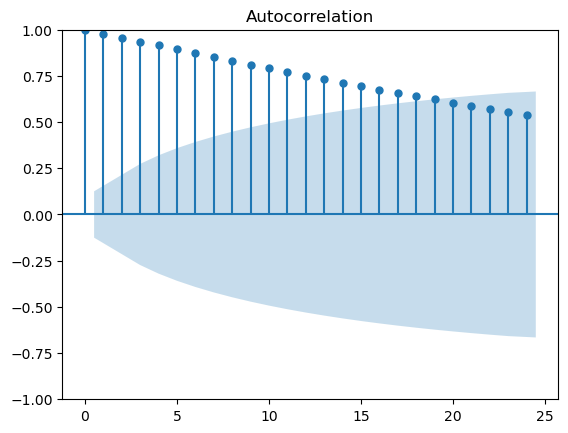

In [178]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [179]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.ind_case, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.306830176022332
2. P-Value :  0.16977456577420647
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 228
5. Critical Values :
	 1% :  -3.4593607492757554
	 5% :  -2.8743015807562924
	 10% :  -2.5735714042782396


P-value is higher for our dataset, and we can say that the evidence of rejecting the null hypothesis is low; hence the time series is non-stationary. 

In [180]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [181]:
data1 # Series integrated to the order of 1

,ind_case
date,
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-09-17,96424.0
2020-09-18,93337.0
2020-09-19,92605.0


In [182]:
data1=data1.iloc[1:] #null value discarded
data1

,ind_case
date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
...,...
2020-09-17,96424.0
2020-09-18,93337.0
2020-09-19,92605.0


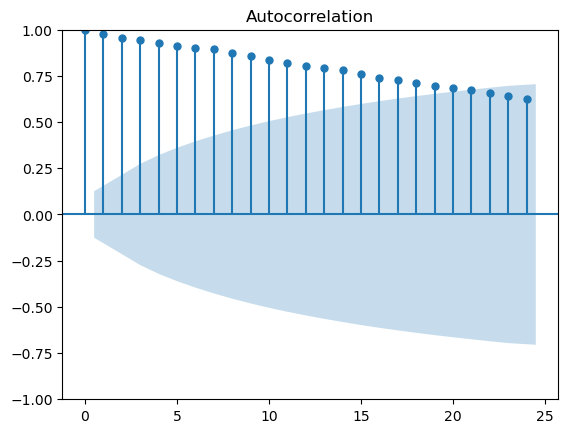

In [183]:
plot_acf(data1); # autocorrelation plot 

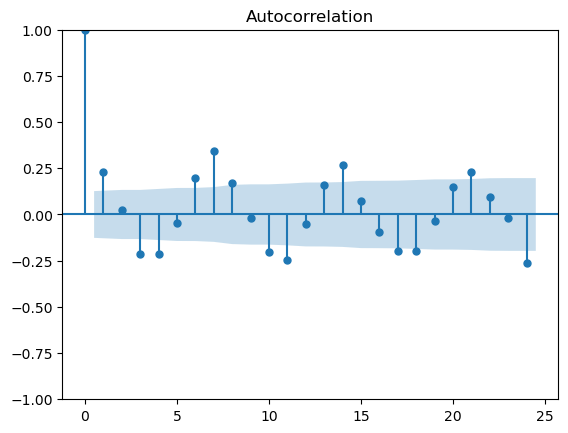

In [184]:
data2=data1.diff(periods=3) # differencing applied to data2
data2=data2.iloc[3:] # integrated to the order of 2
plot_acf(data2);

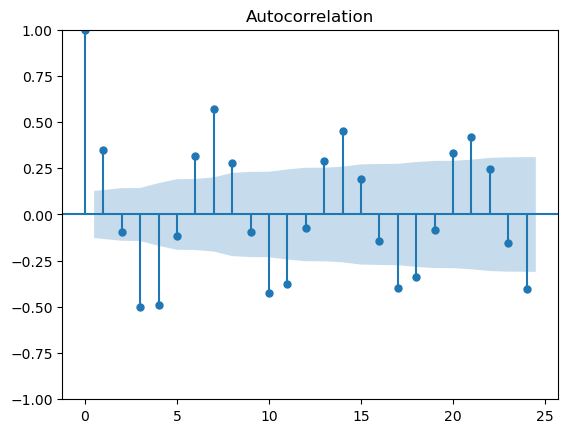

In [185]:
data3=data2.diff(periods=4) # differencing applied to data3
data4=data3.iloc[4:] # integrated to the order of 4
plot_acf(data4);

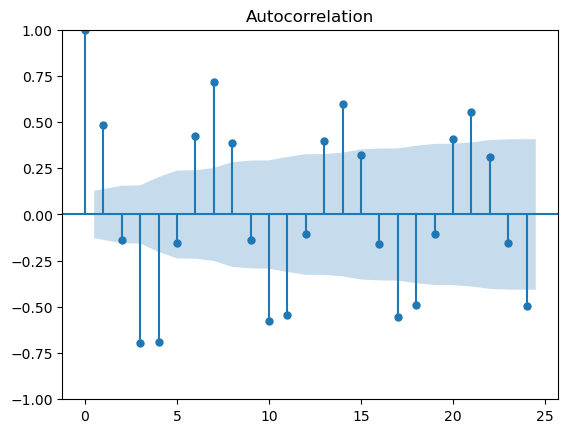

In [186]:
data5=data4.diff(periods=3) # differencing applied to data5
data6=data5.iloc[3:] # integrated to the order of 6
plot_acf(data6);

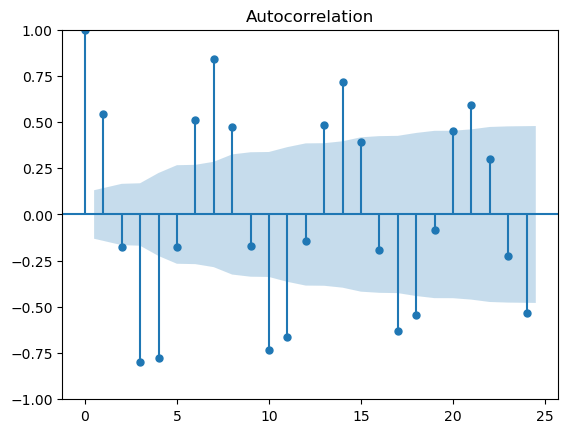

In [187]:
data7=data6.diff(periods=10) # differencing applied to data7
data8=data7.iloc[10:] # integrated to the order of 8
plot_acf(data8);

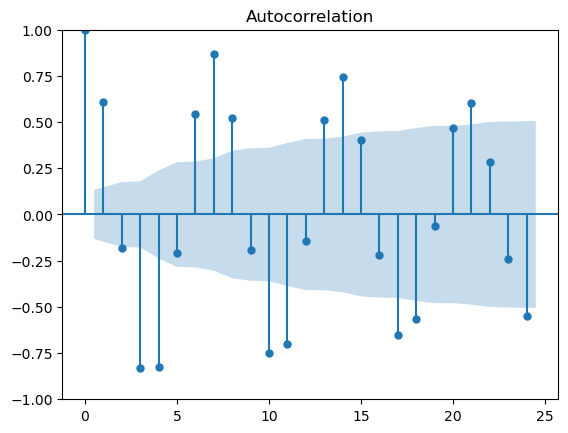

In [188]:
data9=data8.diff(periods=2) # differencing applied to data9
data10=data9.iloc[5:] # integrated to the order of 10
plot_acf(data10);

In [189]:
data10.shape#shape of the data rows and columns

(218, 1)

In [190]:
## Creating training and test sets
train=data10[:170] #from 0th row to 170th row - traning data
test=data10[170:] #from 170th row to end - testing data

In [191]:
from statsmodels.tsa.ar_model import AutoReg
# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data10,maxlag=18,glob=True)
mod.ar_lags

C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 15, 17, 18]

In [192]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5,6, 8, 9, 10, 11, 12, 13, 15,17, 18]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


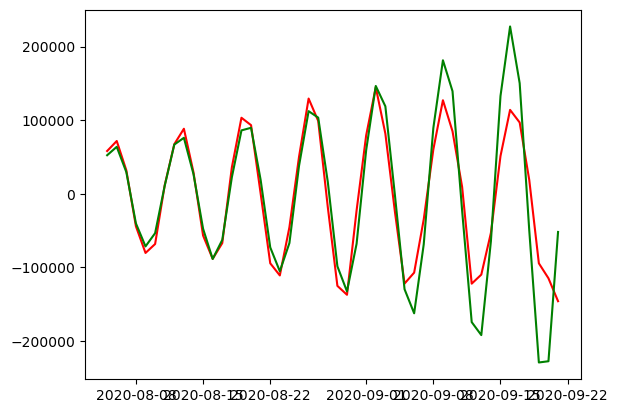

In [193]:
prediction=ar_model_fit.predict(start=170,end=217)


plt.plot(test,color="red")
plt.plot(prediction,color='green') #graph of test vs prediction

In [194]:
r2_score(prediction,test) # r2score of prediction vs test

0.8245030712537252

In [195]:
ticc = r2_score(prediction,test)  # put r2 score in variable

# AR(Auto Regressive) Algorithmns of Time Series for World Death case

In [196]:
# creating dataframe
df = pd.DataFrame(total_death,columns=["world_death_case"])
df1 = pd.DataFrame(date,columns=["dt"])

In [197]:
# concat two dataframe 
data = pd.concat([df1,df],axis=1)
data

,dt,world_death_case
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56
...,...,...
239,9/17/20,946061
240,9/18/20,951767
241,9/19/20,956999
242,9/20/20,960695


In [198]:
data["dt"] = pd.to_datetime(data["dt"])  # change date into datetime
data = data.set_index('dt')  # set date into index 
data

,world_death_case
dt,
2020-01-22,17
2020-01-23,18
2020-01-24,26
2020-01-25,42
2020-01-26,56
...,...
2020-09-17,946061
2020-09-18,951767
2020-09-19,956999


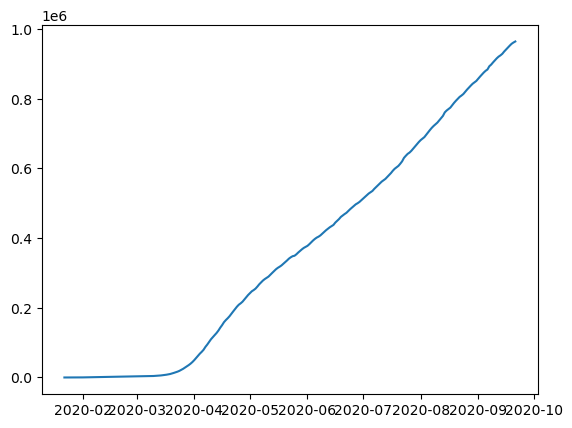

In [199]:
plt.plot(data) # ploting graph

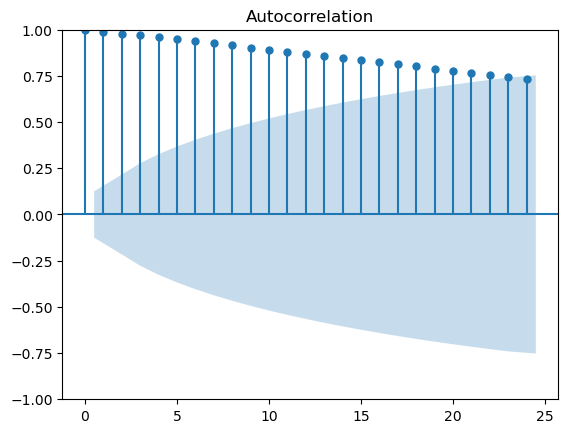

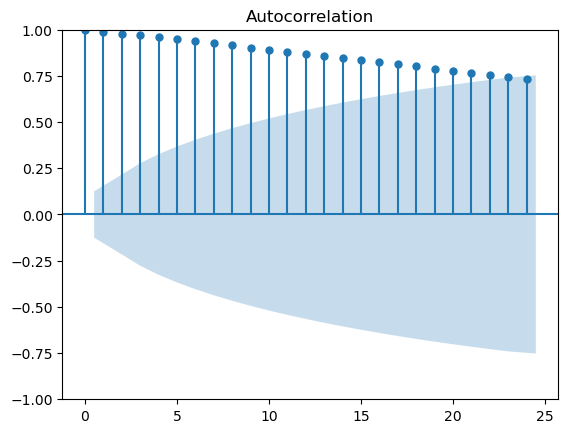

In [200]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [201]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.world_death_case, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.5519913690058527
2. P-Value :  0.9863705389348717
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 231
5. Critical Values :
	 1% :  -3.4589796764641
	 5% :  -2.8741347158661448
	 10% :  -2.573482381701992


P-value is higher for our dataset, and we can say that the evidence of rejecting the null hypothesis is low; hence the time series is non-stationary. 

In [202]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [203]:
data1 # Series integrated to the order of 1

,world_death_case
dt,
2020-01-22,NaN
2020-01-23,1.0
2020-01-24,8.0
2020-01-25,16.0
2020-01-26,14.0
...,...
2020-09-17,5456.0
2020-09-18,5706.0
2020-09-19,5232.0


In [204]:
data1=data1.iloc[1:] #null value discarded
data1

,world_death_case
dt,
2020-01-23,1.0
2020-01-24,8.0
2020-01-25,16.0
2020-01-26,14.0
2020-01-27,26.0
...,...
2020-09-17,5456.0
2020-09-18,5706.0
2020-09-19,5232.0


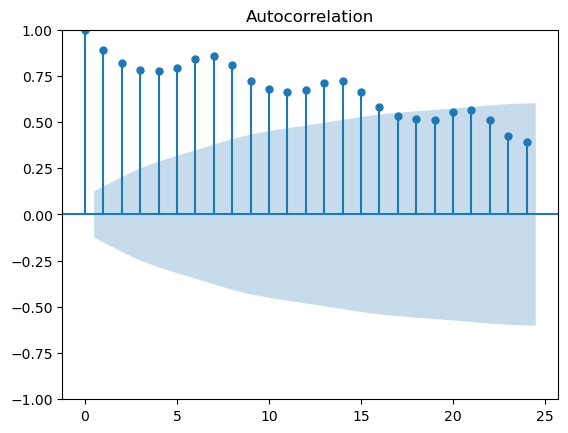

In [205]:
plot_acf(data1); # autocorrelation plot 

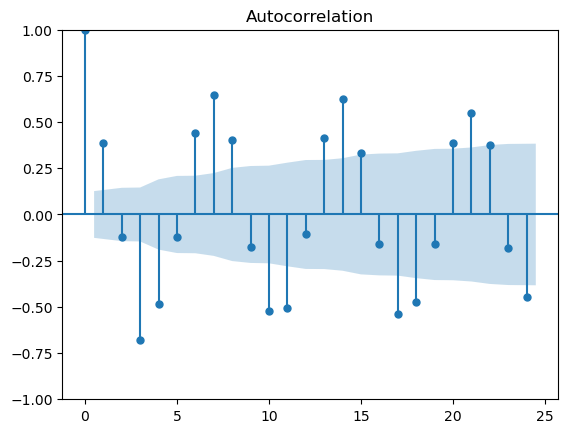

In [206]:
data2=data1.diff(periods=3) # differencing applied to data2
data2=data2.iloc[3:] # integrated to the order of 2
plot_acf(data2);

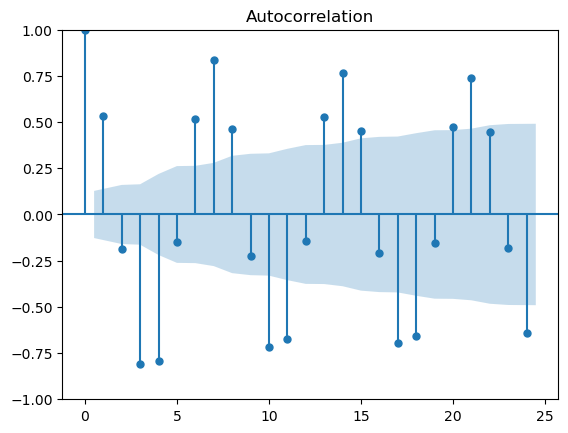

In [207]:
data3=data2.diff(periods=4) # differencing applied to data3
data4=data3.iloc[4:] # integrated to the order of 4
plot_acf(data4);

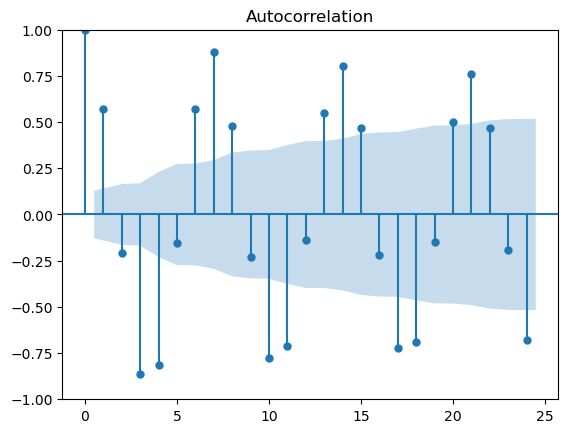

In [208]:
data5=data4.diff(periods=3) # differencing applied to data5
data6=data5.iloc[3:] # integrated to the order of 6
plot_acf(data6);

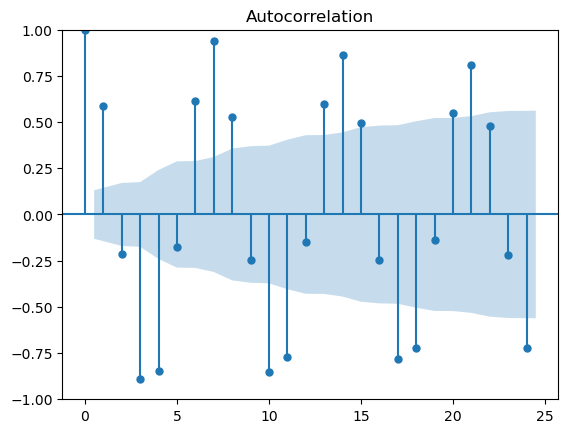

In [209]:
data7=data6.diff(periods=10) # differencing applied to data7
data8=data7.iloc[10:] # integrated to the order of 8
plot_acf(data8);

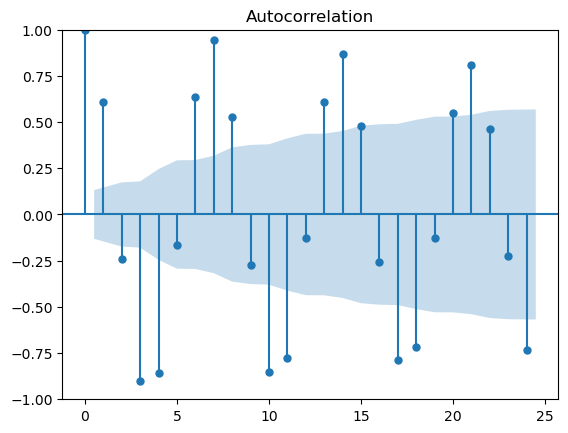

In [210]:
data9=data8.diff(periods=2) # differencing applied to data9
data10=data9.iloc[2:] # integrated to the order of 10
plot_acf(data10);

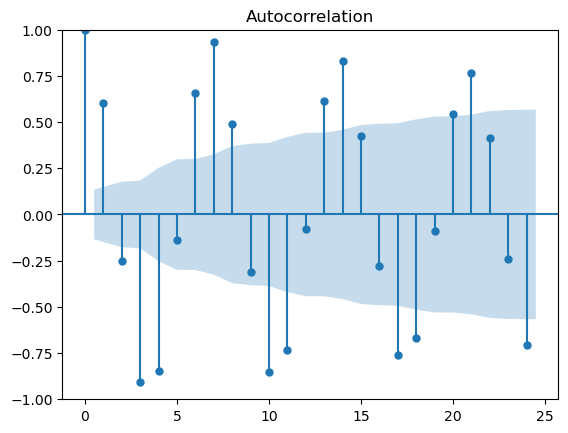

In [211]:
data11=data10.diff(periods=9) # differencing applied to data11
data12=data11.iloc[9:] # integrated to the order of 12
plot_acf(data12);

In [212]:
data12.shape#shape of the data rows and columns

(212, 1)

In [213]:
## Creating training and test sets
train=data12[:170] #from 0th row to 170th row - traning data
test=data12[170:] #from 170th row to end - testing data

In [214]:
from statsmodels.tsa.ar_model import AutoReg
# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data12,maxlag=18,glob=True)
mod.ar_lags

C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 3, 4, 6, 8, 9, 11, 12, 15, 18]

In [215]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 3, 4,5, 6, 8, 9, 11, 12, 15, 18,19,21]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


C:\Users\prash\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


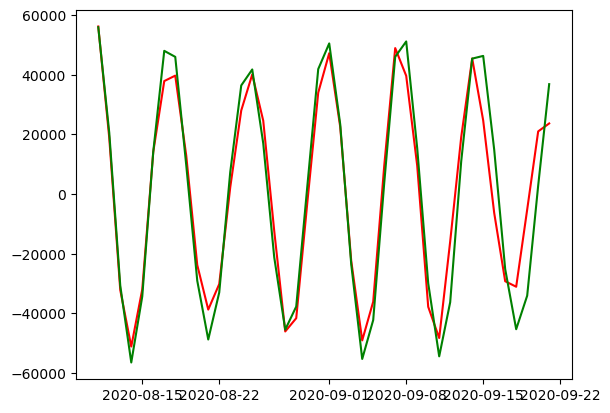

In [216]:
##making prediction
prediction=ar_model_fit.predict(start=170,end=211)
plt.plot(test,color="red")
plt.plot(prediction,color='green') #graph of test vs prediction

In [217]:
r2_score(prediction,test)  # r2score

0.9273328882218511

In [218]:
twdc = r2_score(prediction,test) # put r2 score in variable

# Model Comparison Report

In [219]:
# creating dataframe for model camparison
score = pd.DataFrame({"Model":["LinearRegression","KNN","DecisionTreeRegressor","RandomForestRegressor","XGBRegressor","ANN_MLPRegressor","Time Series"],
                     "R2_Score of World Comfirm Case":[Score*100,r2_score1*100,r2_score2*100,r2_score3*100,r2_score4*100,r2_score5*100,tswcc*100],
                      "R2_Score of world death Case":[r2_score_2*100,r2_score1_2*100,r2_score2_2*100,r2_score3_2*100,r2_score4_2*100,r2_score5_2*100,twdc*100],
                      "R2_Score of India Comfirm case":[r2_score_3*100,r2_score1_3*100,r2_score2_3*100,r2_score3_3*100,r2_score4_3*100,r2_score5_3*100,ticc*100],
                     })

In [220]:
score

,Model,R2_Score of World Comfirm Case,R2_Score of world death Case,R2_Score of India Comfirm case
0,LinearRegression,99.920357,99.477940,99.801252
1,KNN,99.962141,99.975914,99.901006
2,DecisionTreeRegressor,99.957062,99.970974,99.901006
3,RandomForestRegressor,99.977920,99.986602,99.901006
4,XGBRegressor,99.956585,99.971306,99.902083
5,ANN_MLPRegressor,75.350209,87.943936,49.490748
6,Time Series,92.148170,92.733289,82.450307


# Conclusion of Model Comparison Report

I have used 6 Algorithmns which name are LinearRegression,KNN,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor and 
ANN_MLPRegressor for training the model.
I got __99.97__ percentage in __RandomForestRegressor__  and __92.7__ percentage in __Time Series__ which are maximum than all Algorithmn and its working Mindblowing.
So,I am perfering ____RandomForestRegressor____ and __Time Series__ for predicting the COVID-19 CASE of World and INDIA.
Here,I didn't use hyperparameter tunning because without hyperparameter tunning i got 99.9 and 92.7 percentage.
Here,I am suggesting two model because Time Series is Specially use for forcasting.So, you can use both of them model.

# Suggestions to the government health department of the country for preparation

According to this dataset of Comfirmed,Recovered and Death cases of world level and  EDA (EXPLORATORY DATA ANALYSIS) and my experience we got some information and what WHO and Government health department should do. Firstly WHO (world heath organization) and Government health department should declare alert of COVID-19 and according to this datset most of the people infected with COVID-19 virus.The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe.So Doctor should suggest this best way to safe and slow down transmission is to be well informed about the diease and how the virus spreads.Protect yourself and others from infection by staying at 2 meters far from others,wear a proper fitted mask and wash your hand or use an alcohol based rub frequently.Get vaccinated when it's your turn come and follow local guidance. and WHO and our  Government health department should increase bed in Hospital for infected people and try to vaccinated all people as soon as possible.

# Report on Challenges faced

This is __COVID-19__ dataset forcasting/prediction.It has three datset Comfirmed,Recovered and Death cases of world level.Here dates are our independent variable and Comfirmed,Recovered and Death cases are our dependent variable/target variable.
In this dataset __Province/State__ having more than __60% missing value/null value__.So,i didn't use that columns.
In this datset Firstly I got every dates columns and put them into new variable using iloc function. then I run a loop and add all value of Comfirmed,Recovered and Death cases and india cases of per day and total cases.and changed dates into days for forcasting, after that i again run one more loop and add all unique country and put COVID-19 cases according their country and i got COVID-19 case by their Country.after that i did __EDA (EXPLORATORY DATA ANALYSIS)__ and get all insights and try to understand how COVID-19 affected whole world.after this I did model selection,model creation and model evalution.During doing all this it was not easy to do it has taken more time for getting and uderstand whole things.
For getting accuracy in Time Series are little hard.